In [56]:
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from collections import Counter
from scipy.optimize import curve_fit

from scipy.stats import powerlognorm
from scipy.stats import lognorm
from scipy.stats import beta
from scipy.stats import gamma
from scipy.stats import norm
from scipy.stats import chi2
from scipy.stats import genpareto
from scipy.stats import expon
from scipy.stats import truncnorm
from scipy.stats import gengamma 
from scipy.stats import norm
from scipy.stats import betaprime
from scipy.stats import spearmanr
from scipy.stats import pearsonr
 
import scipy as sp
import powerlaw
from scipy import stats

from sklearn.metrics import r2_score

import pandas as pd
import numpy as np
import pickle
from scipy.optimize import minimize
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.dates as mdates
import datetime
from scipy.stats import spearmanr
pd.set_option('display.max_colwidth', None)

In [57]:
results = dict()

results['Number of Tweets'] = pd.DataFrame(index = ['Covid', 'Music', 'Film'], columns = ['Portuguese', 'German', 'Italian', 'Dutch'])
results['Number of Users'] = pd.DataFrame(index = ['Covid', 'Music', 'Film'], columns = ['Portuguese', 'German', 'Italian', 'Dutch'])
results['Best Distribution'] = pd.DataFrame(index = ['Covid', 'Music', 'Film'], columns = ['Portuguese', 'German', 'Italian', 'Dutch'])
results['Gamma Parameters'] = pd.DataFrame(index = ['Covid', 'Music', 'Film'], columns = ['Portuguese', 'German', 'Italian', 'Dutch'])
results['LogNormal Parameters'] = pd.DataFrame(index = ['Covid', 'Music', 'Film'], columns = ['Portuguese', 'German', 'Italian', 'Dutch'])
results['GenGamma Parameters'] = pd.DataFrame(index = ['Covid', 'Music', 'Film'], columns = ['Portuguese', 'German', 'Italian', 'Dutch'])

In [58]:
figure = dict()

In [262]:
df = pd.read_pickle('Covid_counts_it.pkl')
#Data = pd.read_pickle('Covid_meta_it.pkl')
#df = pd.read_pickle('Covid_counts_pt.pkl')

In [263]:
len(df), np.sum(df['Count'])

(2719486, 6738712)

In [264]:
len(df.Text.loc[i].split())

KeyError: 'Portuguese'

In [ ]:
sizes = [len(df.Text.loc[i].split()) for i in df.index]
print(pearsonr(sizes, df['Count'].values))
print(spearmanr(sizes, df['Count'].values))

In [265]:
df.head()

,Text,Count,Tweet
0,! CORONA ! CORONA ! CORONA! https://t.co/dqT4bznVqv,1,0
1658288,E Corona lekapoti eh day na kerala lo vundai vallam. Corona valla mottam gone 😥😭😭 https://t.co/iyhLqGSIkD,1,1
1658287,E Corona https://t.co/svqxJa5gSV,1,2
1658285,E Corona assessore all'ambiente? https://t.co/SXew3ra6td,1,3
1658283,E Corona a 20 😂😂😂,1,4


In [266]:
def exp_sol(x,l, sc):
    return ((1/x)*expon.pdf(np.log(x), loc = -l, scale=sc))


def gamma_sol(x,s,l, sc):
    return ((1/x)*gamma.pdf(np.log(x), a=s, loc = -l, scale=sc))
def lognorm_sol(x,s,l, sc):
    return ((1/x)*lognorm.pdf(np.log(x), s=s, loc = -l, scale=sc))

def gengamma_sol(x,s,c, l, sc):
    return ((1/x)*gengamma.pdf(np.log(x), a=s, c=c, loc = l, scale=sc))

def pl_sol(x,s,l,sc):
    return (1/x)*sp.stats.powerlaw.pdf(np.log(x), s, loc = -l, scale=sc)

def powerlognorm_sol(x,s,z, l,sc):
    return ((1/x)*gengamma.pdf(np.log(x), s, z,loc = -l, scale=sc))

def beta_sol (x,s,z, l, sc):
    #x_m = np.max(x)
    #logx = np.log(x)/np.log(x_m)
    return (1/x)*betaprime.pdf(x, a=s, b=z, loc=l, scale=sc)


# def my_dist (x, frac,s1,l1,sc1,s2,l2,sc2):
#     return (1/x)*gamma.pdf(np.log(x), a=s1, scale=sc1)*frac + lognorm.pdf(x, s=s2, scale=sc2)*(1-frac)


In [267]:
gamma.pdf(np.log(1.1), a=0.5, loc = 0, scale=1)

1.6613561140420294

In [268]:
n = 0
Nf = df[df.Count>n].Count
x= np.array(df[df.Count>n].groupby('Count')['Count'].count().index)
y = list(df[df.Count>n].groupby('Count')['Count'].count().values/len(df[df.Count>n].Count))

x_int=x
y_int=list()
for i in range(len(x_int)):
    y_int.append(np.sum(y[:i+1]))

In [269]:
x=x[1:]
y=y[1:]

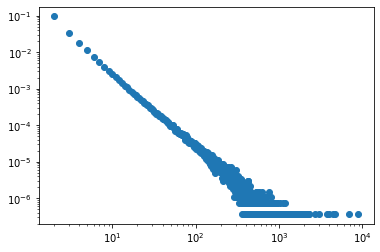

In [270]:
plt.scatter(x,y)
plt.yscale('log')
plt.xscale('log')

In [271]:
pars_exp,cov_exp = curve_fit(xdata=x, ydata=y, f = exp_sol, maxfev = 800000)
pars_gamma,cov_gamma = curve_fit(xdata=x, ydata=y, f = gamma_sol, maxfev = 800000)
pars_lognormal,cov_lognormal = curve_fit(xdata=x, ydata=y, f = lognorm_sol, maxfev = 800000)
pars_pl,cov_pl = curve_fit(xdata=x, ydata=y, f = pl_sol, maxfev = 80000000)
pars_pln,cov_pln = curve_fit(xdata=x, ydata=y, f = powerlognorm_sol, maxfev = 800000)
pars_beta,cov_beta = curve_fit(xdata=x, ydata=y, f = beta_sol, maxfev = 800000)
pars_gg,cov_gg = curve_fit(xdata=x, ydata=y, f = gengamma_sol, maxfev = 800000)

/home/lilia/venv/sample_environment/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [272]:
pars_gg

array([0.08912489, 1.60093785, 0.1156294 , 2.21243574])

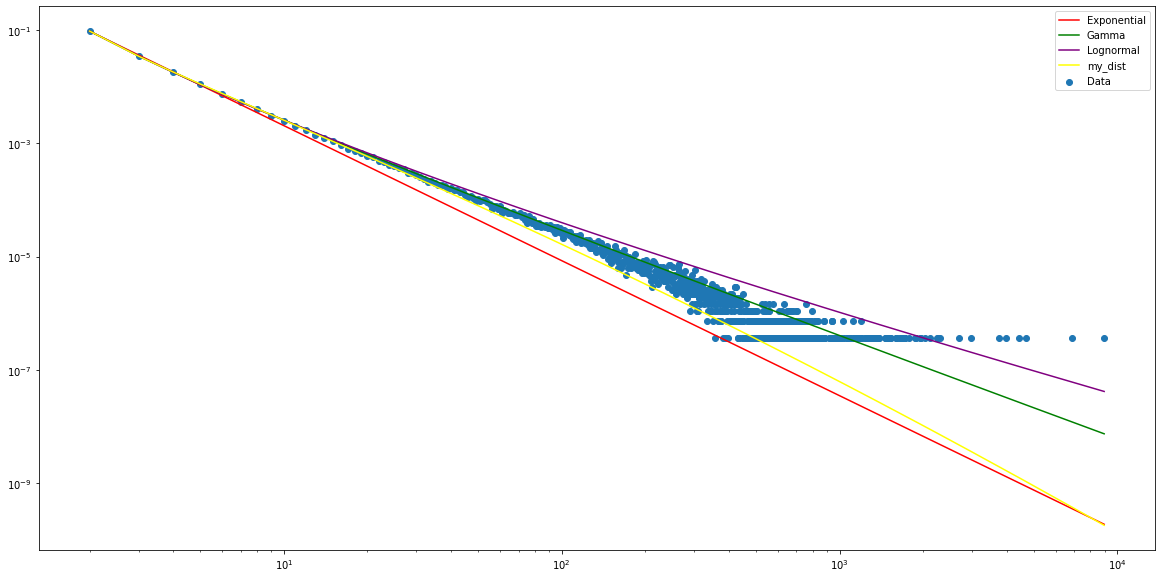

In [273]:
plt.figure(figsize=(20,10))
plt.scatter(x,y, label='Data')
plt.plot(x,exp_sol(x, pars_exp[0], pars_exp[1]), c='red', label='Exponential')
plt.plot(x,gamma_sol(x, pars_gamma[0], pars_gamma[1], pars_gamma[2]), c='green', label='Gamma')
plt.plot(x,lognorm_sol(x, pars_lognormal[0], pars_lognormal[1], pars_lognormal[2]), c='purple', label='Lognormal')
plt.plot(x,gengamma_sol(x, pars_gg[0], pars_gg[1], pars_gg[2], pars_gg[3]), c='yellow', label='my_dist')
plt.yscale('log')
plt.xscale('log')
plt.legend()

In [274]:
# scores = pd.DataFrame(index = ['Exponential', 'Gamma', 'Lognormal'], columns = ['R2', 'LL', 'RMSE'])
# scores.loc['Exponential','R2'] = r2_score(y, exp_sol(x, pars_exp[0]))
# scores.loc['Exponential','RMSE'] = np.mean(np.sqrt((y-exp_sol(x, pars_exp[0]))**2))
# scores.loc['Exponential','LL'] = np.sum(np.log(exp_sol(Nf,pars_exp[0])))

# scores.loc['Gamma','R2'] = r2_score(y, gamma_sol(x, pars_gamma[0], pars_gamma[1]))
# scores.loc['Gamma','RMSE'] = np.mean(np.sqrt((y-gamma_sol(x, pars_gamma[0], pars_gamma[1]))**2))
# scores.loc['Gamma','LL'] = np.sum(np.log(gamma_sol(Nf,pars_gamma[0],pars_gamma[1])))

# scores.loc['Lognormal','R2'] = r2_score(y, lognorm_sol(x, pars_lognormal[0], pars_lognormal[1]))
# scores.loc['Lognormal','RMSE'] = np.mean(np.sqrt((y-lognorm_sol(x, pars_lognormal[0], pars_lognormal[1]))**2))
# scores.loc['Lognormal','LL'] = np.sum(np.log(lognorm_sol(Nf,pars_lognormal[0],pars_lognormal[1])))

In [275]:
n = 0
Nf = df[df.Count>n].Count
x= np.array(df[df.Count>n].groupby('Count')['Count'].count().index)
y = df[df.Count>n].groupby('Count')['Count'].count().values/len(df[df.Count>n].Count)

x_int=x
y_int=list()
for i in range(len(x_int)):
    y_int.append(np.sum(y[:i+1]))

In [276]:
normalizer=len(df)
normalizer

2719486

In [277]:
def gamma_(params_gamma):
    s = params_gamma[0]
    l = params_gamma[1]   
    sc = params_gamma[2]  
    #alpha = params_gamma[2]

    yPred =(1/x)*gamma.pdf(np.log(x), a=s, loc = -l, scale=sc)
    #yPred =(1/Nf)*gamma.pdf(np.log(Nf), a=s, loc = l, scale=alpha)

    #LL = -np.sum(np.log(yPred))
    LL = -np.sum( stats.norm.logpdf(yPred, loc=y, scale=np.sqrt(normalizer*y*(1-y))/normalizer ) )
    #LL = -np.sum(np.log(gamma_sol(Nf,params_gamma[0],params_gamma[1],params_gamma[2])))

    return(LL)


def lognorm_(params_gamma):
    s = params_gamma[0]
    l = params_gamma[1]   
    sc = params_gamma[2]
    #alpha = params_gamma[2]



    #yPred =(1/Nf)*lognorm.pdf(np.log(Nf), s=s, loc = l, scale=alpha)
    yPred =(1/x)*lognorm.pdf(np.log(x), s=s, loc = -l, scale=sc)

    # Calculate negative log likelihood
    LL = -np.sum( stats.norm.logpdf(yPred, loc=y, scale=np.sqrt(normalizer*y*(1-y))/normalizer ) )
    #LL = -np.sum(np.log(yPred))
    #LL = -np.sum(np.log(lognorm_sol(Nf,params_gamma[0],params_gamma[1],params_gamma[2])))
    #LL = -np.sum(np.log(yPred))

    return(LL)


def gengamma_(params_gamma):
    s = params_gamma[0]
    c = params_gamma[1]
    l = params_gamma[2]   
    sc = params_gamma[3]
    
    yPred =(1/x)*gengamma.pdf(np.log(x), a=s, c=c, loc = l, scale=sc)

    # Calculate negative log likelihood
    LL = -np.sum( stats.norm.logpdf(yPred, loc=y, scale=np.sqrt(normalizer*y*(1-y))/normalizer ) )

    return(LL)


def exp_(params_gamma):
    l = params_gamma[0]   
    sc = params_gamma[1]
    #alpha = params_gamma[1]



    #yPred =(1/Nf)*expon.pdf(np.log(Nf), loc = l, scale=alpha)
    yPred =(1/x)*expon.pdf(np.log(x), loc = -l, scale=sc)

    # Calculate negative log likelihood
    LL = -np.sum( stats.norm.logpdf(yPred, loc=y, scale=np.sqrt(normalizer*y*(1-y))/normalizer ) )
    #LL = -np.sum(np.log(yPred))
    #LL = -np.sum(np.log(exp_sol(Nf,params_gamma[0],params_gamma[1],params_gamma[2])))
    #LL = -np.sum(np.log(yPred))

    return(LL)


def beta_(params_gamma):
    a = params_gamma[0] 
    b = params_gamma[1]
    l = params_gamma[2]
    sc = params_gamma[3]
    
    #alpha = params_gamma[1]
    
    #x_m = np.max(x)
    #logx = np.log(x)/np.log(x_m)



    #yPred =(1/Nf)*expon.pdf(np.log(Nf), loc = l, scale=alpha)
    yPred =(1/x)*betaprime.pdf(np.log(x), a=a, b=b, loc=-l, scale=sc)

    # Calculate negative log likelihood
    LL = -np.sum( stats.norm.logpdf(yPred, loc=y, scale=np.sqrt(normalizer*y*(1-y))/normalizer ) )
    #LL = -np.sum(np.log(yPred))
    #LL = -np.sum(np.log(exp_sol(Nf,params_gamma[0],params_gamma[1],params_gamma[2])))
    #LL = -np.sum(np.log(yPred))

    return(LL)



def my_dist_ (params_my):
    
    s1 = params_my[1]
    l1 = params_my[2]
    sc1 = params_my[3]
    s2 = params_my[4]
    l2 = params_my[5]
    sc2 = params_my[6]
    frac = params_my[0]
    
    yPred = (1/x)*gamma.pdf(np.log(x), a=s1, loc = -l1, scale=sc1)*frac + lognorm.pdf(x, s=s2, loc = -l2, scale=sc2)*(1-frac)
    LL = -np.sum( stats.norm.logpdf(yPred, loc=y, scale=np.sqrt(normalizer*y*(1-y))/normalizer ) )
    return (LL)


def PL_(params_gamma):
    l = params_gamma[0]   
    alpha = params_gamma[1]


    yPred =l*x**alpha

    # Calculate negative log likelihood
    LL = -np.sum( stats.norm.logpdf(yPred, loc=y, scale=np.sqrt(normalizer*y*(1-y))/normalizer ) )
    #LL = -np.sum(np.log(yPred))
    #LL = -np.sum(np.log(exp_pl(Nf,params_gamma[0],params_gamma[1],params_gamma[2])))
    #LL = -np.sum(np.log(yPred))

    return(LL)

In [278]:
initParams_g = pars_gamma
initParams_l = pars_lognormal
initParams_e= pars_exp
initParams_p =[1,1]
initParams_b = pars_beta
initParams_gg = pars_gg
initParams_gg =[0.15852716, 1.23560947, -0.1369193, 1.81500778]

In [279]:
initParams_gg

[0.15852716, 1.23560947, -0.1369193, 1.81500778]

In [280]:
initParams_g = pars_gamma
initParams_l = pars_lognormal
initParams_e= pars_exp
initParams_p =[1,1]
initParams_b = pars_beta
initParams_gg = [0.15852716, 1.23560947, -0.01369193, 1.81500778]



results_gamma = minimize(gamma_, initParams_g, method='Nelder-Mead', options={'maxiter': 10000})
print (results_gamma.x)
results_lognormal = minimize(lognorm_, initParams_l, method='Nelder-Mead', options={'maxiter': 10000})
print(results_lognormal.x)
results_exp = minimize(exp_, initParams_e , method='Nelder-Mead', options={'maxiter': 10000})
print(results_exp.x)
results_PL = minimize(PL_, initParams_p, method='Nelder-Mead', options={'maxiter': 10000})
print(results_PL.x)
results_beta = minimize(beta_, initParams_b, method='Nelder-Mead', options={'maxiter': 10000})
print(results_beta.x)
results_gg = minimize(gengamma_, initParams_gg, method='Nelder-Mead', options={'maxiter': 10000})
print(results_gg.x)

[0.37598946 0.23851894 1.16502221]
[0.91596036 0.54038991 0.46602003]
[0.45388503 0.57052139]
[ 0.79107901 -2.75277253]
[9.62031638e+01 3.16415847e+00 8.09987559e-01 2.19399879e-02]
[ 1.01778956  0.69049026 -0.31903714  0.38489799]


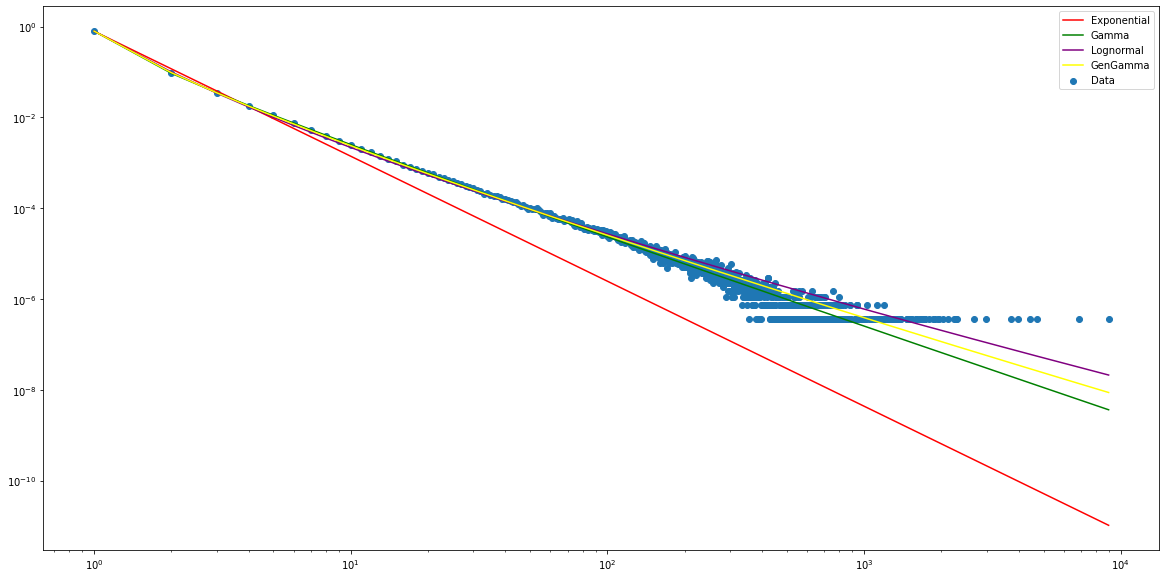

In [281]:
plt.figure(figsize=(20,10))
plt.scatter(x,y, label='Data')
plt.plot(x,exp_sol(x, results_exp.x[0], results_exp.x[1]), c='red', label='Exponential')
plt.plot(x,gamma_sol(x, results_gamma.x[0], results_gamma.x[1], results_gamma.x[2]), c='green', label='Gamma')
plt.plot(x,lognorm_sol(x, results_lognormal.x[0], results_lognormal.x[1], results_lognormal.x[2]), c='purple', label='Lognormal')
plt.plot(x,gengamma_sol(x, results_gg.x[0], results_gg.x[1], results_gg.x[2], results_gg.x[3]), c='yellow', label='GenGamma')
plt.yscale('log')
plt.xscale('log')
#plt.ylim(0.000001,1)
plt.legend()

In [282]:
scores = pd.DataFrame(index = ['Exponential', 'Gamma', 'Lognormal', 'GenGamma'], columns = ['R2', 'LL', 'RMSE'])
scores.loc['Exponential','R2'] = r2_score(y, exp_sol(x, results_exp.x[0], results_exp.x[1]))
scores.loc['Exponential','RMSE'] = np.mean(np.sqrt((y-exp_sol(x, results_exp.x[0], results_exp.x[1]))**2))
yPred =(1/x)*expon.pdf(np.log(x), loc=results_exp.x[0], scale =results_exp.x[1])
scores.loc['Exponential','LL'] =  np.sum( stats.norm.logpdf(yPred, loc=y, scale=np.sqrt(normalizer*y*(1-y))/normalizer ) )


scores.loc['Gamma','R2'] = r2_score(y, gamma_sol(x, results_gamma.x[0], results_gamma.x[1], results_gamma.x[2]))
scores.loc['Gamma','RMSE'] = np.mean(np.sqrt((y-gamma_sol(x, results_gamma.x[0], results_gamma.x[1], results_gamma.x[2]))**2))
yPred =(1/x)*gamma.pdf(np.log(x), a=results_gamma.x[0], loc = results_gamma.x[1], scale = results_gamma.x[2])
scores.loc['Gamma','LL'] = np.sum( stats.norm.logpdf(yPred, loc=y, scale=np.sqrt(normalizer*y*(1-y))/normalizer ) )


scores.loc['GenGamma','R2'] = r2_score(y, gengamma_sol(x, results_gg.x[0], results_gg.x[1], results_gg.x[2], results_gg.x[3]))
scores.loc['GenGamma','RMSE'] = np.mean(np.sqrt((y-gengamma_sol(x, results_gg.x[0], results_gg.x[1], results_gg.x[2], results_gg.x[3]))**2))
yPred =(1/x)*gengamma.pdf(np.log(x), a=results_gg.x[0], c= results_gg.x[1], loc = results_gg.x[2], scale = results_gg.x[3])
scores.loc['GenGamma','LL'] = np.sum( stats.norm.logpdf(yPred, loc=y, scale=np.sqrt(normalizer*y*(1-y))/normalizer ) )


scores.loc['Lognormal','R2'] = r2_score(y, lognorm_sol(x, results_lognormal.x[0], results_lognormal.x[1], results_lognormal.x[2]))
scores.loc['Lognormal','RMSE'] = np.mean(np.sqrt((y-lognorm_sol(x, results_lognormal.x[0], results_lognormal.x[1], results_lognormal.x[2]))**2))
yPred =(1/x)*lognorm.pdf(np.log(x), s=results_lognormal.x[0], loc = results_lognormal.x[1], scale = results_lognormal.x[2])
scores.loc['Lognormal','LL'] = np.sum( stats.norm.logpdf(yPred, loc=y, scale  =np.sqrt(normalizer*y*(1-y))/normalizer ) )

print(scores) 
scores.loc['Gamma','LL']-scores.loc['Lognormal','LL'], scores.loc['Gamma','LL']-scores.loc['GenGamma','LL']

                   R2               LL      RMSE
Exponential  0.999125 -10636614.067817  0.000071
Gamma        0.999996  -5660138.390631  0.000005
Lognormal    0.999947 -13881652.893744  0.000017
GenGamma     0.999993      9518.517343  0.000007


(8221514.503112383, -5669656.907973712)

In [283]:
scores.loc['Gamma','LL']-scores.loc['Lognormal','LL'], scores.loc['Gamma','LL']-scores.loc['GenGamma','LL']

(8221514.503112383, -5669656.907973712)

In [284]:
results_gamma.x, results_lognormal.x, results_gg.x

(array([0.37598946, 0.23851894, 1.16502221]),
 array([0.91596036, 0.54038991, 0.46602003]),
 array([ 1.01778956,  0.69049026, -0.31903714,  0.38489799]))

In [285]:
figure['Italian'] = pd.DataFrame(index = x, columns = ['data','GGD'])
figure['Italian'].data = y
figure['Italian'].GGD = gengamma_sol(x, results_gg.x[0], results_gg.x[1], results_gg.x[2], results_gg.x[3])

In [83]:
Data = pd.read_pickle('Covid_meta_it.pkl')
results['Number of Tweets'].loc['Covid','Italian'] = len(df)
results['Number of Users'].loc['Covid','Italian'] = Data.Screen_Name.nunique()
results['Best Distribution'].loc['Covid','Italian'] = 'Gamma (2423)'
results['Gamma Parameters'].loc['Covid','Italian'] = [0.37597758, 0.23851536, 1.16505069]
results['LogNormal Parameters'].loc['Covid','Italian'] = [0.91593551, 0.54040615, 0.46603608]
results['GenGamma Parameters'].loc['Covid','Italian'] = results_gg.x
del Data

In [84]:
results_evt = minimize(evt, [0,0,1], method='Nelder-Mead', options={'maxiter': 10000})
print(results_evt.x)

[-0.3320889  -0.20103282  0.34325447]


In [85]:
df = pd.read_pickle('Covid_counts_nl.pkl')
#Data = pd.read_pickle('Covid_meta_nl.pkl')

In [86]:
len(df), np.sum(df['Count'])

(3293620, 7159327)

In [87]:
sizes = [len(df.Text.loc[i].split()) for i in df.index]
print(pearsonr(sizes, df['Count'].values))
print(spearmanr(sizes, df['Count'].values))

(0.0282609238960198, 0.0)
SpearmanrResult(correlation=0.06225171041752586, pvalue=0.0)


In [88]:
n = 0
Nf = df[df.Count>n].Count
x= np.array(df[df.Count>n].groupby('Count')['Count'].count().index)
y = df[df.Count>n].groupby('Count')['Count'].count().values/len(df[df.Count>n].Count)

x_int=x
y_int=list()
for i in range(len(x_int)):
    y_int.append(np.sum(y[:i+1]))

In [89]:
normalizer=len(df)
normalizer

3293620

In [90]:
pars_exp,cov_exp = curve_fit(xdata=x, ydata=y, f = exp_sol, maxfev = 800000)
pars_gamma,cov_gamma = curve_fit(xdata=x, ydata=y, f = gamma_sol, maxfev = 800000)
pars_lognormal,cov_lognormal = curve_fit(xdata=x, ydata=y, f = lognorm_sol, maxfev = 800000)
pars_pl,cov_pl = curve_fit(xdata=x, ydata=y, f = pl_sol, maxfev = 80000000)
pars_pln,cov_pln = curve_fit(xdata=x, ydata=y, f = powerlognorm_sol, maxfev = 800000)
pars_beta,cov_beta = curve_fit(xdata=x, ydata=y, f = beta_sol, maxfev = 800000)
pars_gg,cov_gg = curve_fit(xdata=x, ydata=y, f = gengamma_sol, maxfev = 800000)

/home/lilia/venv/sample_environment/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [91]:
scores.loc['Gamma','LL']-scores.loc['Lognormal','LL'], scores.loc['Gamma','LL']-scores.loc['Exponential','LL']

(8221514.503112383, 4976475.677185936)

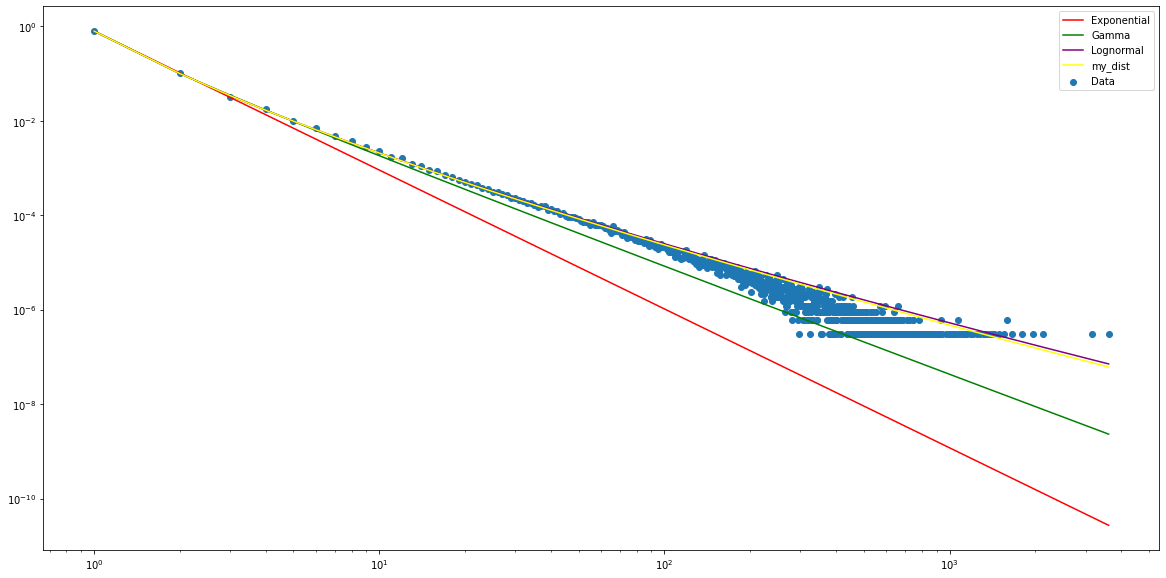

In [92]:
plt.figure(figsize=(20,10))
plt.scatter(x,y, label='Data')
plt.plot(x,exp_sol(x, pars_exp[0], pars_exp[1]), c='red', label='Exponential')
plt.plot(x,gamma_sol(x, pars_gamma[0], pars_gamma[1], pars_gamma[2]), c='green', label='Gamma')
plt.plot(x,lognorm_sol(x, pars_lognormal[0], pars_lognormal[1], pars_lognormal[2]), c='purple', label='Lognormal')
plt.plot(x,gengamma_sol(x, pars_gg[0], pars_gg[1], pars_gg[2], pars_gg[3]), c='yellow', label='my_dist')
plt.yscale('log')
plt.xscale('log')
plt.legend()

In [93]:
initParams_g = pars_gamma
initParams_l = pars_lognormal
initParams_e= pars_exp
initParams_p =[1,1]
initParams_b = pars_beta
initParams_gg = pars_gg



results_gamma = minimize(gamma_, initParams_g, method='Nelder-Mead', options={'maxiter': 10000})
print (results_gamma.x)
results_lognormal = minimize(lognorm_, initParams_l, method='Nelder-Mead', options={'maxiter': 10000})
print(results_lognormal.x)
results_exp = minimize(exp_, initParams_e , method='Nelder-Mead', options={'maxiter': 10000})
print(results_exp.x)
results_PL = minimize(PL_, initParams_p, method='Nelder-Mead', options={'maxiter': 10000})
print(results_PL.x)
results_beta = minimize(beta_, initParams_b, method='Nelder-Mead', options={'maxiter': 10000})
print(results_beta.x)
results_gg = minimize(gengamma_, initParams_gg, method='Nelder-Mead', options={'maxiter': 10000})
print(results_gg.x)

[0.42869431 0.26150682 1.0231529 ]
[0.83784716 0.58949729 0.51731733]
[0.45195348 0.56806825]
[ 0.79446918 -2.76036914]
[ 0.48830256 19.76363006  0.28395443 17.59093047]
[ 6.53774155e+01  1.35620707e-01 -5.43661950e-01  2.00631561e-14]


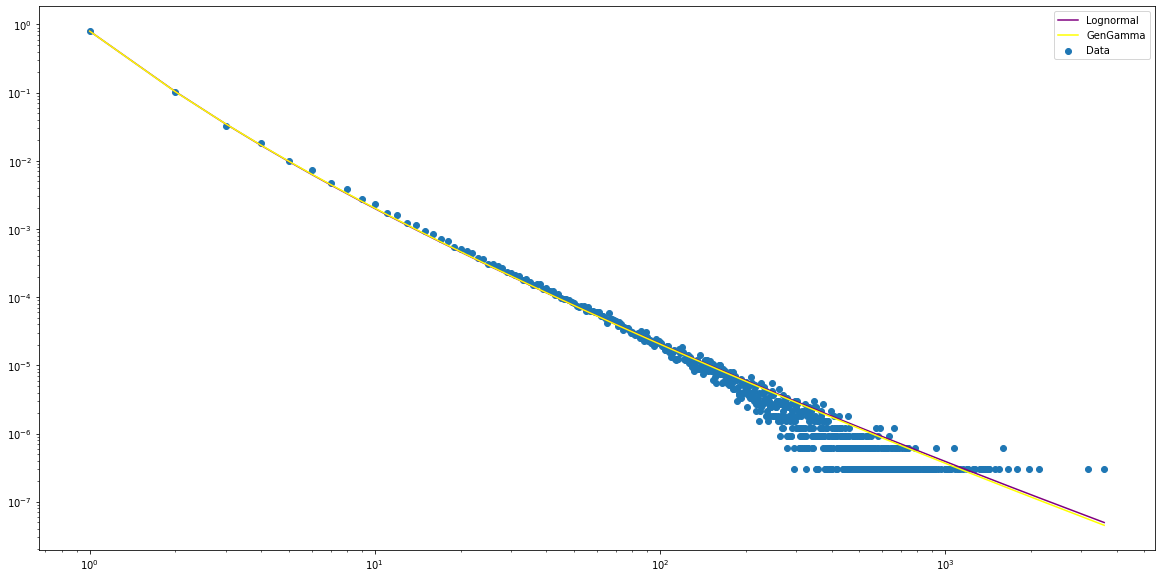

In [94]:
plt.figure(figsize=(20,10))
plt.scatter(x,y, label='Data')
#plt.plot(x,exp_sol(x, results_exp.x[0], results_exp.x[1]), c='red', label='Exponential')
#plt.plot(x,gamma_sol(x, results_gamma.x[0], results_gamma.x[1], results_gamma.x[2]), c='green', label='Gamma')
plt.plot(x,lognorm_sol(x, results_lognormal.x[0], results_lognormal.x[1], results_lognormal.x[2]), c='purple', label='Lognormal')
plt.plot(x,gengamma_sol(x, results_gg.x[0], results_gg.x[1], results_gg.x[2], results_gg.x[3]), c='yellow', label='GenGamma')
plt.yscale('log')
plt.xscale('log')
#plt.ylim(0.000001,1)
plt.legend()

In [96]:
scores = pd.DataFrame(index = ['Exponential', 'Gamma', 'Lognormal', 'GenGamma'], columns = ['R2', 'LL', 'RMSE'])
scores.loc['Exponential','R2'] = r2_score(y, exp_sol(x, results_exp.x[0], results_exp.x[1]))
scores.loc['Exponential','RMSE'] = np.mean(np.sqrt((y-exp_sol(x, results_exp.x[0], results_exp.x[1]))**2))
yPred =(1/x)*expon.pdf(np.log(x), loc=results_exp.x[0], scale =results_exp.x[1])
scores.loc['Exponential','LL'] =  np.sum( stats.norm.logpdf(yPred, loc=y, scale=np.sqrt(normalizer*y*(1-y))/normalizer ) )


scores.loc['Gamma','R2'] = r2_score(y, gamma_sol(x, results_gamma.x[0], results_gamma.x[1], results_gamma.x[2]))
scores.loc['Gamma','RMSE'] = np.mean(np.sqrt((y-gamma_sol(x, results_gamma.x[0], results_gamma.x[1], results_gamma.x[2]))**2))
yPred =(1/x)*gamma.pdf(np.log(x), a=results_gamma.x[0], loc = results_gamma.x[1], scale = results_gamma.x[2])
scores.loc['Gamma','LL'] = np.sum( stats.norm.logpdf(yPred, loc=y, scale=np.sqrt(normalizer*y*(1-y))/normalizer ) )


scores.loc['GenGamma','R2'] = r2_score(y, gengamma_sol(x, results_gg.x[0], results_gg.x[1], results_gg.x[2], results_gg.x[3]))
scores.loc['GenGamma','RMSE'] = np.mean(np.sqrt((y-gengamma_sol(x, results_gg.x[0], results_gg.x[1], results_gg.x[2], results_gg.x[3]))**2))
yPred =(1/x)*gengamma.pdf(np.log(x), a=results_gg.x[0], c= results_gg.x[1], loc = results_gg.x[2], scale = results_gg.x[3])
scores.loc['GenGamma','LL'] = np.sum( stats.norm.logpdf(yPred, loc=y, scale=np.sqrt(normalizer*y*(1-y))/normalizer ) )


scores.loc['Lognormal','R2'] = r2_score(y, lognorm_sol(x, results_lognormal.x[0], results_lognormal.x[1], results_lognormal.x[2]))
scores.loc['Lognormal','RMSE'] = np.mean(np.sqrt((y-lognorm_sol(x, results_lognormal.x[0], results_lognormal.x[1], results_lognormal.x[2]))**2))
yPred =(1/x)*lognorm.pdf(np.log(x), s=results_lognormal.x[0], loc = results_lognormal.x[1], scale = results_lognormal.x[2])
scores.loc['Lognormal','LL'] = np.sum( stats.norm.logpdf(yPred, loc=y, scale  =np.sqrt(normalizer*y*(1-y))/normalizer ) )

print(scores) 
scores.loc['Gamma','LL']-scores.loc['Lognormal','LL'], scores.loc['Gamma','LL']-scores.loc['GenGamma','LL']

                   R2               LL      RMSE
Exponential  0.999499 -12768976.718312  0.000066
Gamma        0.999955  -7149726.302768  0.000015
Lognormal    0.999979 -14428962.992014  0.000016
GenGamma     0.999982      6584.729398  0.000015


(7279236.689246664, -7156311.032165649)

In [97]:
scores.loc['Gamma','LL']-scores.loc['Lognormal','LL'], scores.loc['Gamma','LL']-scores.loc['Exponential','LL'], scores.loc['Gamma','LL']-scores.loc['GenGamma','LL']

(7279236.689246664, 5619250.415544022, -7156311.032165649)

In [98]:
results_gamma.x, results_lognormal.x, results_gg.x

(array([0.42869431, 0.26150682, 1.0231529 ]),
 array([0.83784716, 0.58949729, 0.51731733]),
 array([ 6.53774155e+01,  1.35620707e-01, -5.43661950e-01,  2.00631561e-14]))

In [99]:
Data = pd.read_pickle('Covid_meta_nl.pkl')
results['Number of Tweets'].loc['Covid','Dutch'] = len(df)
results['Number of Users'].loc['Covid','Dutch'] = Data.Screen_Name.nunique()
results['Best Distribution'].loc['Covid','Dutch'] = 'Gamma (1212)'
results['Gamma Parameters'].loc['Covid','Dutch'] = [0.42869431, 0.26150682, 1.0231529 ]
results['LogNormal Parameters'].loc['Covid','Dutch'] = [0.83784716, 0.58949729, 0.51731733]
results['GenGamma Parameters'].loc['Covid','Dutch'] = results_gg.x
del Data

In [100]:
figure['Dutch'] = pd.DataFrame(index = x, columns = ['data','GGD'])
figure['Dutch'].data = y
figure['Dutch'].GGD = gengamma_sol(x, results_gg.x[0], results_gg.x[1], results_gg.x[2], results_gg.x[3])

In [101]:
results_evt = minimize(evt, [0,0,1], method='Nelder-Mead', options={'maxiter': 10000})
print(results_evt.x)

[-0.27931156 -0.20122031  0.35377548]


In [102]:
df = pd.read_pickle('Covid_counts_de.pkl')
#Data = pd.read_pickle('Covid_meta_nl.pkl')

In [103]:
len(df), np.sum(df['Count'])

(5392367, 13566605)

In [104]:
sizes = [len(df.Text.loc[i].split()) for i in df.index]
print(pearsonr(sizes, df['Count'].values))
print(spearmanr(sizes, df['Count'].values))

(0.030773644298603704, 0.0)
SpearmanrResult(correlation=0.08269945342608039, pvalue=0.0)


In [105]:
n = 0
Nf = df[df.Count>n].Count
x= np.array(df[df.Count>n].groupby('Count')['Count'].count().index)
y = df[df.Count>n].groupby('Count')['Count'].count().values/len(df[df.Count>n].Count)

x_int=x
y_int=list()
for i in range(len(x_int)):
    y_int.append(np.sum(y[:i+1]))

In [106]:
normalizer=len(df)
normalizer

5392367

In [107]:
pars_exp,cov_exp = curve_fit(xdata=x, ydata=y, f = exp_sol, maxfev = 800000)
pars_gamma,cov_gamma = curve_fit(xdata=x, ydata=y, f = gamma_sol, maxfev = 800000)
pars_lognormal,cov_lognormal = curve_fit(xdata=x, ydata=y, f = lognorm_sol, maxfev = 800000)
pars_pl,cov_pl = curve_fit(xdata=x, ydata=y, f = pl_sol, maxfev = 80000000)
pars_pln,cov_pln = curve_fit(xdata=x, ydata=y, f = powerlognorm_sol, maxfev = 800000)
pars_beta,cov_beta = curve_fit(xdata=x, ydata=y, f = beta_sol, maxfev = 800000)
pars_gg,cov_gg = curve_fit(xdata=x, ydata=y, f = gengamma_sol, maxfev = 800000)

/home/lilia/venv/sample_environment/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


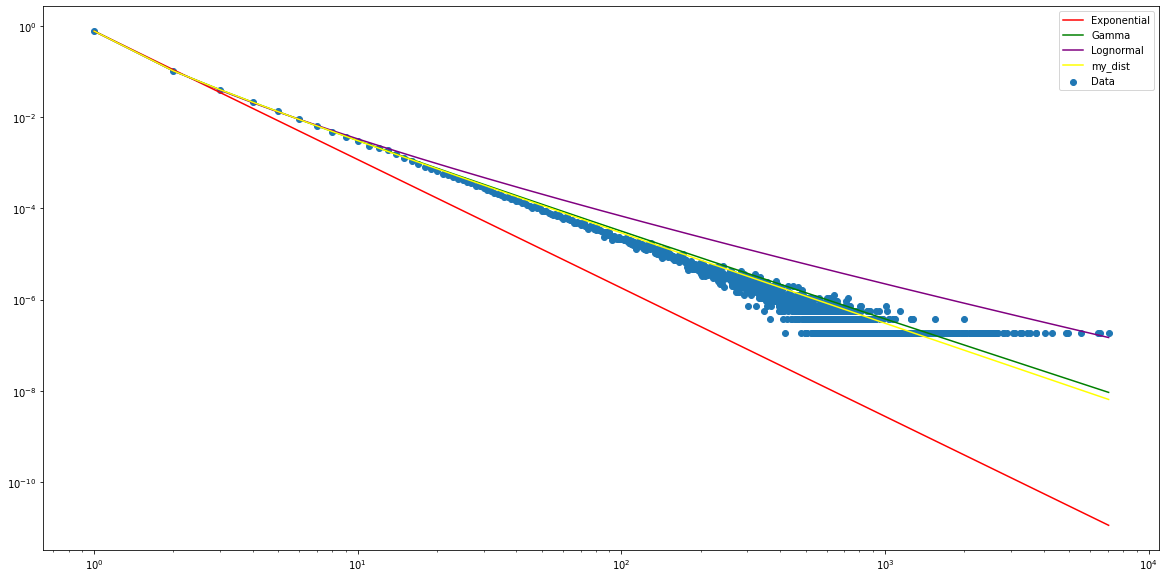

In [108]:
plt.figure(figsize=(20,10))
plt.scatter(x,y, label='Data')
plt.plot(x,exp_sol(x, pars_exp[0], pars_exp[1]), c='red', label='Exponential')
plt.plot(x,gamma_sol(x, pars_gamma[0], pars_gamma[1], pars_gamma[2]), c='green', label='Gamma')
plt.plot(x,lognorm_sol(x, pars_lognormal[0], pars_lognormal[1], pars_lognormal[2]), c='purple', label='Lognormal')
plt.plot(x,gengamma_sol(x, pars_gg[0], pars_gg[1], pars_gg[2], pars_gg[3]), c='yellow', label='my_dist')
plt.yscale('log')
plt.xscale('log')
plt.legend()

In [109]:
initParams_g = pars_gamma
initParams_l = pars_lognormal
initParams_e= pars_exp
initParams_p =[1,1]
initParams_b = pars_beta
initParams_gg = pars_gg



results_gamma = minimize(gamma_, initParams_g, method='Nelder-Mead', options={'maxiter': 10000})
print (results_gamma.x)
results_lognormal = minimize(lognorm_, initParams_l, method='Nelder-Mead', options={'maxiter': 10000})
print(results_lognormal.x)
results_exp = minimize(exp_, initParams_e , method='Nelder-Mead', options={'maxiter': 10000})
print(results_exp.x)
results_PL = minimize(PL_, initParams_p, method='Nelder-Mead', options={'maxiter': 10000})
print(results_PL.x)
results_beta = minimize(beta_, initParams_b, method='Nelder-Mead', options={'maxiter': 10000})
print(results_beta.x)
results_gg = minimize(gengamma_, initParams_gg, method='Nelder-Mead', options={'maxiter': 10000})
print(results_gg.x)

[0.4761285  0.28463602 1.07315665]
[0.81826634 0.63163395 0.5893665 ]
[0.4601343  0.63260529]
[ 0.7637956 -2.5807693]
[4.81364244e-01 1.07324543e+14 2.86746798e-01 1.14183595e+14]
[ 0.26289636  1.27633147 -0.2295081   1.64604679]


In [110]:
from scipy.stats import genextreme

In [111]:
def evt (params):
    c = params[0]
    l = params[1]
    sc = params[2]
  
    yPred = (1/x)*genextreme.pdf(np.log(x),c=c, loc=l, scale=sc)
    LL = -np.sum( stats.norm.logpdf(yPred, loc=y, scale=np.sqrt(normalizer*y*(1-y))/normalizer ) )
    return (LL)

In [112]:
results_evt = minimize(evt, [0,0,1], method='Nelder-Mead', options={'maxiter': 10000})
print(results_evt.x)

[-0.27302221 -0.18512112  0.38827765]


In [113]:
def evt_sol(x,c,l,sc):
    return (1/x)*genextreme.pdf(np.log(x),c=c, loc=l, scale=sc)

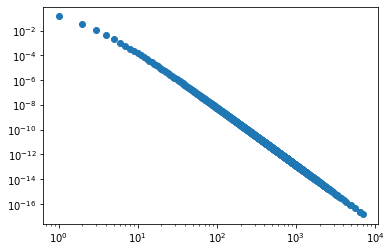

In [114]:
x= np.array(df[df.Count>n].groupby('Count')['Count'].count().index)
plt.scatter(x,genextreme.pdf(x,c=-0.27302221,loc= -0.18512112,scale=  0.38827765))
plt.yscale('log')
plt.xscale('log')

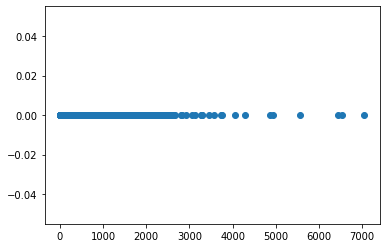

In [115]:
x= np.array(df[df.Count>n].groupby('Count')['Count'].count().index)
plt.scatter(x,genextreme.pdf(x,c=0.5,loc= -0.18512112,scale=  0.5))


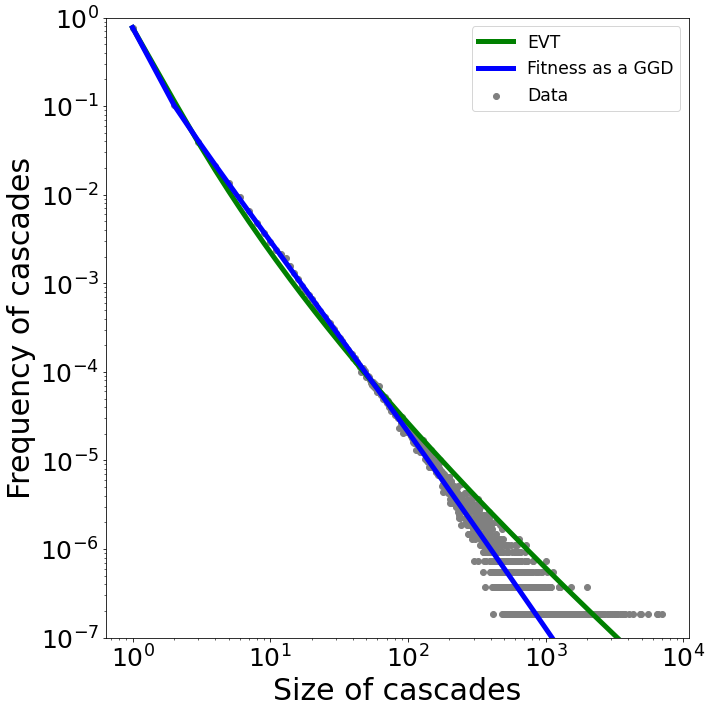

In [116]:
plt.figure(figsize=(10,10))
plt.scatter(x,y, c='grey', label='Data')
plt.plot(x,evt_sol(x, results_evt.x[0], results_evt.x[1], results_evt.x[2]), c='green', linewidth=5, label='EVT')
#plt.plot(x,gamma_sol(x, results_gamma.x[0], results_gamma.x[1], results_gamma.x[2]), c='green', label='Gamma')
#plt.plot(x,lognorm_sol(x, results_lognormal.x[0], results_lognormal.x[1], results_lognormal.x[2]), c='purple', label='Lognormal')
plt.plot(x,gengamma_sol(x, results_gg.x[0], results_gg.x[1], results_gg.x[2], results_gg.x[3]), c='blue', linewidth=5,label='Fitness as a GGD')
plt.yscale('log')
plt.xscale('log')
plt.ylim(0.0000001,1)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.ylabel('Frequency of cascades', fontsize=30)
plt.xlabel('Size of cascades', fontsize=30)
plt.legend(fontsize='xx-large')
plt.tight_layout()
plt.savefig('GGD.png')

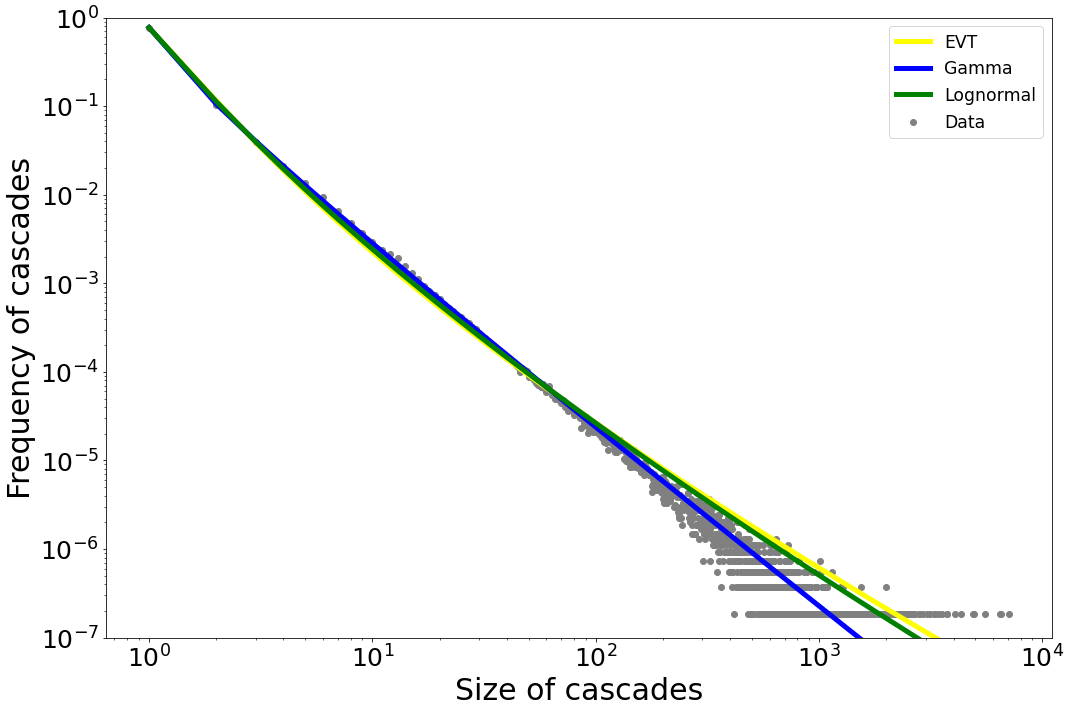

In [117]:
plt.figure(figsize=(15,10))
plt.scatter(x,y, c='grey', label='Data')
plt.plot(x,evt_sol(x, results_evt.x[0], results_evt.x[1], results_evt.x[2]), c='yellow', linewidth=5, label='EVT')
plt.plot(x,gamma_sol(x, results_gamma.x[0], results_gamma.x[1], results_gamma.x[2]), linewidth=5, c='blue', label='Gamma')
plt.plot(x,lognorm_sol(x, results_lognormal.x[0], results_lognormal.x[1], results_lognormal.x[2]), linewidth=5, c='green', label='Lognormal')
#plt.plot(x,gengamma_sol(x, results_gg.x[0], results_gg.x[1], results_gg.x[2], results_gg.x[3]), c='blue', linewidth=5,label='Fitness as a GGD')
plt.yscale('log')
plt.xscale('log')
plt.ylim(0.0000001,1)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.ylabel('Frequency of cascades', fontsize=30)
plt.xlabel('Size of cascades', fontsize=30)
plt.legend(fontsize='xx-large')
plt.tight_layout()
plt.savefig('Distributions_result.png')

In [118]:
figure['German'] = pd.DataFrame(index = x, columns = ['data','GGD'])
figure['German'].data = y
figure['German'].GGD = gengamma_sol(x, results_gg.x[0], results_gg.x[1], results_gg.x[2], results_gg.x[3])

In [119]:
exceptions = df[df['Count']==13]
exceptions

,Text,Count,Tweet
3580727,"Hier erfährst du, was das für dich künftig beim Einkaufen bedeutet. https://t.co/JWjGsl7K3o",13,5282977
3580729,"Hier erfährst du, was das für dich künftig beim Einkaufen bedeutet. https://t.co/NLhIQnnIIc",13,5282978
4562066,"Steuer Unterlagen, Haaransatz, COVID Test, Kuss von Melania... ich glaub dem Dude gar nichts bevor ich das nicht alles mit eigenen Augen gesehen habe!",13,5282979
3378777,"Follow @mariodujakovic - wer kompetente Auskunft zu den #Covid Zahlen in Wien will. Empfehle hiermit auch dem Minister @rudi_anschober , beim Herrn Dujakovic nachzufragen. Der kennt sich wenigstens aus und gibt der Öffentlichkeit die Daten weiter!",13,5282980
4867749,"Wegen Corona CO2-schleudernde Unternehmen zu entlasten, ist die dümmste Option. Wenn wir glimpflich aus der Pandemie rauskommen, dafür aber den Klimawandel stark beschleunigen, ist nichts gewonnen. Diese beiden Krisen müssen gleichzeitig gelöst werden. https://t.co/r51lf1W6yn",13,5282981
...,...,...,...
327455,"&gt; Alle ... gelten als „Covidioten“, auch dann, wenn sie mündig Einschränkungen mittragen, die wissenschaftlichen Erkenntnisse explizit nicht in Abrede stellen – aber sich wünschen, dass über die Konsequenzen diskutiert wird.&lt; https://t.co/IFzeTG1WIQ",13,5293430
2662405,"Corona-Update: Der Höhepunkt ist erst mal überschritten, zeigen die Zahlen der wichtigsten Länder. In Deutschland problematisch: Bremen. https://t.co/NjbagmUiPj",13,5293431
344050,"+++ ""Wir hatten ja schon im November gesagt, dass die Beschlüsse weiterhin gelten, wenn sich nichts gravierend ändert. Darauf haben wir uns heute nochmal geeinigt"", so Merkel. +++\nhttps://t.co/lvmj2QY9b5",13,5293432
342147,+ Erster Corona-kranker Hund in USA ist tot https://t.co/QtAMKoCKgH,13,5293433


In [120]:
Data = pd.read_pickle('Covid_meta_de.pkl')
Data.head()

,Date,Time,Tweet,Screen_Name
0,2020-03-22 08:29:41,0,2630055,Heidenkinder
1,2020-03-22 08:29:42,1,1877894,huradax
2,2020-03-22 08:29:42,2,5379529,think_abouts
3,2020-03-22 08:29:43,3,2839316,Aenigmea
4,2020-03-22 08:29:44,4,242311,hirschiihd


In [121]:
Data[Data.Tweet == 5293434]

,Date,Time,Tweet,Screen_Name
12319458,2020-12-06 19:19:04,12319458,5293434,focuspanorama
12319512,2020-12-06 19:20:03,12319512,5293434,focuspanorama
12319523,2020-12-06 19:20:12,12319523,5293434,focuspolitik
12319526,2020-12-06 19:20:15,12319526,5293434,focusreise
12319530,2020-12-06 19:20:18,12319530,5293434,focussport
12319533,2020-12-06 19:20:20,12319533,5293434,focuskultur
12319538,2020-12-06 19:20:23,12319538,5293434,focusgesundheit
12319542,2020-12-06 19:20:27,12319542,5293434,focusfinanzen
12319545,2020-12-06 19:20:30,12319545,5293434,focusdigital
12319548,2020-12-06 19:20:34,12319548,5293434,focusauto


In [122]:
scores = pd.DataFrame(index = ['Exponential', 'Gamma', 'Lognormal', 'GenGamma'], columns = ['R2', 'LL', 'RMSE'])
scores.loc['Exponential','R2'] = r2_score(y, exp_sol(x, results_exp.x[0], results_exp.x[1]))
scores.loc['Exponential','RMSE'] = np.mean(np.sqrt((y-exp_sol(x, results_exp.x[0], results_exp.x[1]))**2))
yPred =(1/x)*expon.pdf(np.log(x), loc=results_exp.x[0], scale =results_exp.x[1])
scores.loc['Exponential','LL'] =  np.sum( stats.norm.logpdf(yPred, loc=y, scale=np.sqrt(normalizer*y*(1-y))/normalizer ) )


scores.loc['Gamma','R2'] = r2_score(y, gamma_sol(x, results_gamma.x[0], results_gamma.x[1], results_gamma.x[2]))
scores.loc['Gamma','RMSE'] = np.mean(np.sqrt((y-gamma_sol(x, results_gamma.x[0], results_gamma.x[1], results_gamma.x[2]))**2))
yPred =(1/x)*gamma.pdf(np.log(x), a=results_gamma.x[0], loc = results_gamma.x[1], scale = results_gamma.x[2])
scores.loc['Gamma','LL'] = np.sum( stats.norm.logpdf(yPred, loc=y, scale=np.sqrt(normalizer*y*(1-y))/normalizer ) )


scores.loc['GenGamma','R2'] = r2_score(y, gengamma_sol(x, results_gg.x[0], results_gg.x[1], results_gg.x[2], results_gg.x[3]))
scores.loc['GenGamma','RMSE'] = np.mean(np.sqrt((y-gengamma_sol(x, results_gg.x[0], results_gg.x[1], results_gg.x[2], results_gg.x[3]))**2))
yPred =(1/x)*gengamma.pdf(np.log(x), a=results_gg.x[0], c= results_gg.x[1], loc = results_gg.x[2], scale = results_gg.x[3])
scores.loc['GenGamma','LL'] = np.sum( stats.norm.logpdf(yPred, loc=y, scale=np.sqrt(normalizer*y*(1-y))/normalizer ) )


scores.loc['Lognormal','R2'] = r2_score(y, lognorm_sol(x, results_lognormal.x[0], results_lognormal.x[1], results_lognormal.x[2]))
scores.loc['Lognormal','RMSE'] = np.mean(np.sqrt((y-lognorm_sol(x, results_lognormal.x[0], results_lognormal.x[1], results_lognormal.x[2]))**2))
yPred =(1/x)*lognorm.pdf(np.log(x), s=results_lognormal.x[0], loc = results_lognormal.x[1], scale = results_lognormal.x[2])
scores.loc['Lognormal','LL'] = np.sum( stats.norm.logpdf(yPred, loc=y, scale  =np.sqrt(normalizer*y*(1-y))/normalizer ) )

yPred =(1/x)*genextreme.pdf(np.log(x), c=results_evt.x[0], loc = results_evt.x[1], scale = results_evt.x[2])
LL_evt = np.sum( stats.norm.logpdf(yPred, loc=y, scale  =np.sqrt(normalizer*y*(1-y))/normalizer ) )

print(scores) 
scores.loc['Gamma','LL']-scores.loc['Lognormal','LL'], scores.loc['Gamma','LL']-LL_evt

                   R2               LL      RMSE
Exponential  0.998868 -17796085.999507  0.000053
Gamma        0.999985 -10362502.686179  0.000007
Lognormal    0.999821 -20095713.180084  0.000023
GenGamma     0.999998     14023.126203  0.000003


(9733210.493904674, -10358398.70544635)

In [123]:
scores.loc['Gamma','LL']-scores.loc['Lognormal','LL'], scores.loc['Gamma','LL']-scores.loc['Exponential','LL']

(9733210.493904674, 7433583.313328339)

In [124]:
results_gamma.x, results_lognormal.x

(array([0.4761285 , 0.28463602, 1.07315665]),
 array([0.81826634, 0.63163395, 0.5893665 ]))

In [125]:
Data = pd.read_pickle('Covid_meta_de.pkl')
results['Number of Tweets'].loc['Covid','German'] = len(df)
results['Number of Users'].loc['Covid','German'] = Data.Screen_Name.nunique()
results['Best Distribution'].loc['Covid','German'] = 'Gamma (10181)'
results['Gamma Parameters'].loc['Covid','German'] = [0.4761285 , 0.28463602, 1.07315665]
results['LogNormal Parameters'].loc['Covid','German'] = [0.81826634, 0.63163395, 0.5893665 ]
results['GenGamma Parameters'].loc['Covid','German'] = results_gg.x
del Data

In [126]:
df = pd.read_pickle('Covid_counts_pt.pkl')

In [127]:
len(df), np.sum(df['Count'])

(20595795, 66185221)

In [128]:
sizes = [len(df.Text.loc[i].split()) for i in df.index]
print(pearsonr(sizes, df['Count'].values))
print(spearmanr(sizes, df['Count'].values))

(0.011221087009855715, 0.0)
SpearmanrResult(correlation=0.08011156574601748, pvalue=0.0)


In [129]:
n = 0
Nf = df[df.Count>n].Count
x= np.array(df[df.Count>n].groupby('Count')['Count'].count().index)
y = df[df.Count>n].groupby('Count')['Count'].count().values/len(df[df.Count>n].Count)

x_int=x
y_int=list()
for i in range(len(x_int)):
    y_int.append(np.sum(y[:i+1]))

In [130]:
normalizer=len(df)
normalizer

20595795

In [131]:
#normalizer=100

In [132]:
pars_exp,cov_exp = curve_fit(xdata=x, ydata=y, f = exp_sol, maxfev = 800000)
pars_gamma,cov_gamma = curve_fit(xdata=x, ydata=y, f = gamma_sol, maxfev = 800000)
pars_lognormal,cov_lognormal = curve_fit(xdata=x, ydata=y, f = lognorm_sol, maxfev = 800000)
pars_pl,cov_pl = curve_fit(xdata=x, ydata=y, f = pl_sol, maxfev = 80000000)
pars_pln,cov_pln = curve_fit(xdata=x, ydata=y, f = powerlognorm_sol, maxfev = 800000)
pars_beta,cov_beta = curve_fit(xdata=x, ydata=y, f = beta_sol, maxfev = 800000)
pars_gg,cov_gg = curve_fit(xdata=x, ydata=y, f = gengamma_sol, maxfev = 800000)

/home/lilia/venv/sample_environment/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


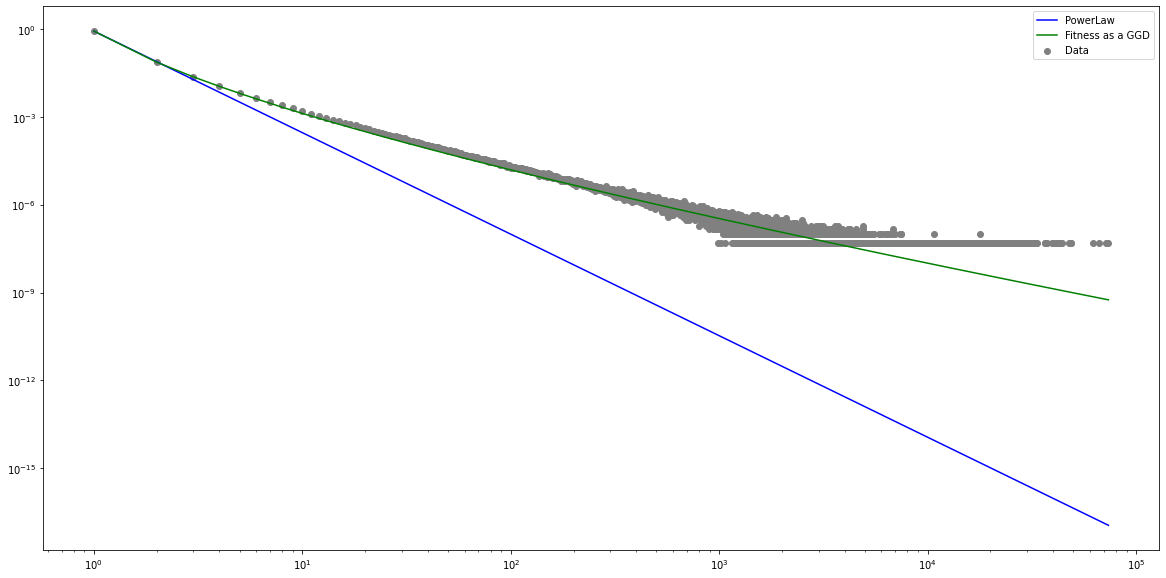

In [133]:
plt.figure(figsize=(20,10))
plt.scatter(x,y, label='Data', c='grey')
plt.plot(x,exp_sol(x, pars_exp[0], pars_exp[1]), c='blue', label='PowerLaw')
#plt.plot(x,gamma_sol(x, pars_gamma[0], pars_gamma[1], pars_gamma[2]), c='green', label='Gamma')
#plt.plot(x,lognorm_sol(x, pars_lognormal[0], pars_lognormal[1], pars_lognormal[2]), c='purple', label='Lognormal')
plt.plot(x,gengamma_sol(x, pars_gg[0], pars_gg[1], pars_gg[2], pars_gg[3]), c='green', label='Fitness as a GGD')
plt.yscale('log')
plt.xscale('log')
#plt.ylim(0.0001)
plt.legend()

In [134]:
initParams_g = pars_gamma
initParams_l = pars_lognormal
initParams_e= pars_exp
initParams_p =[1,1]
initParams_b = pars_beta
initParams_gg = pars_gg



results_gamma = minimize(gamma_, initParams_g, method='Nelder-Mead', options={'maxiter': 10000})
print (results_gamma.x)
results_lognormal = minimize(lognorm_, initParams_l, method='Nelder-Mead', options={'maxiter': 10000})
print(results_lognormal.x)
results_exp = minimize(exp_, initParams_e , method='Nelder-Mead', options={'maxiter': 10000})
print(results_exp.x)
results_PL = minimize(PL_, initParams_p, method='Nelder-Mead', options={'maxiter': 10000})
print(results_PL.x)
results_beta = minimize(beta_, initParams_b, method='Nelder-Mead', options={'maxiter': 10000})
print(results_beta.x)
results_gg = minimize(gengamma_, initParams_gg, method='Nelder-Mead', options={'maxiter': 10000})
print(results_gg.x)

[0.22923524 0.16175473 1.25827541]
[1.07329755 0.40801879 0.27811408]
[0.43120119 0.44381578]
[ 0.85279934 -3.25319529]
[26.94182893  2.62933956  0.61038242  0.0417829 ]
[ 6.03578779e+01  1.10112773e-01 -3.78939847e-01  1.76099661e-17]


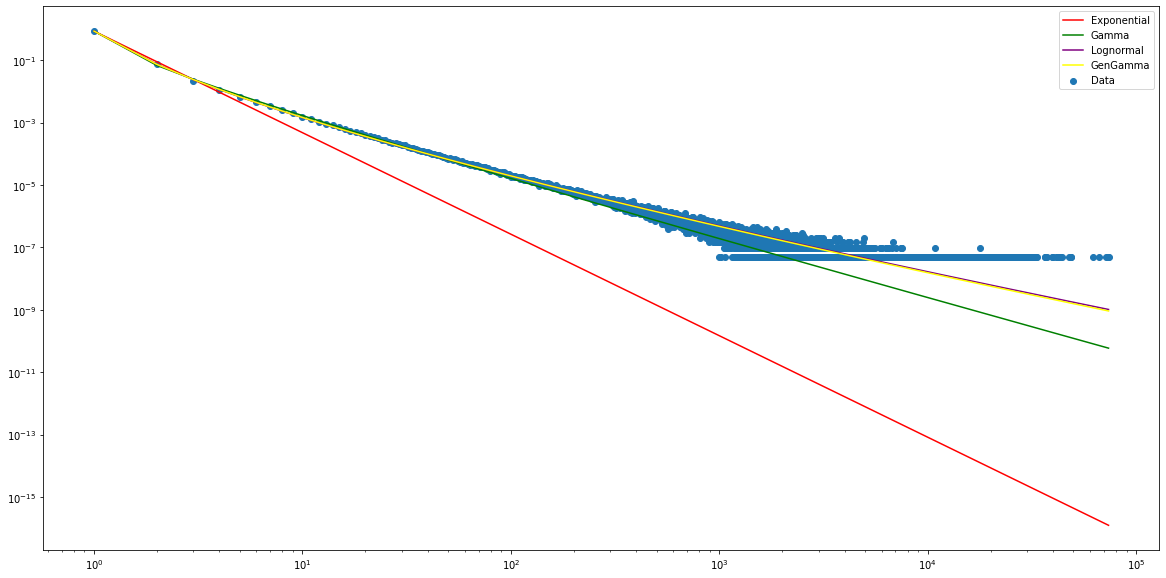

In [135]:
plt.figure(figsize=(20,10))
plt.scatter(x,y, label='Data')
plt.plot(x,exp_sol(x, results_exp.x[0], results_exp.x[1]), c='red', label='Exponential')
plt.plot(x,gamma_sol(x, results_gamma.x[0], results_gamma.x[1], results_gamma.x[2]), c='green', label='Gamma')
plt.plot(x,lognorm_sol(x, results_lognormal.x[0], results_lognormal.x[1], results_lognormal.x[2]), c='purple', label='Lognormal')
plt.plot(x,gengamma_sol(x, results_gg.x[0], results_gg.x[1], results_gg.x[2], results_gg.x[3]), c='yellow', label='GenGamma')
plt.yscale('log')
plt.xscale('log')
#plt.ylim(0.000001,1)
plt.legend()

In [136]:
scores = pd.DataFrame(index = ['Exponential', 'Gamma', 'Lognormal', 'GenGamma'], columns = ['R2', 'LL', 'RMSE'])
scores.loc['Exponential','R2'] = r2_score(y, exp_sol(x, results_exp.x[0], results_exp.x[1]))
scores.loc['Exponential','RMSE'] = np.mean(np.sqrt((y-exp_sol(x, results_exp.x[0], results_exp.x[1]))**2))
yPred =(1/x)*expon.pdf(np.log(x), loc=results_exp.x[0], scale =results_exp.x[1])
scores.loc['Exponential','LL'] =  np.sum( stats.norm.logpdf(yPred, loc=y, scale=np.sqrt(normalizer*y*(1-y))/normalizer ) )


scores.loc['Gamma','R2'] = r2_score(y, gamma_sol(x, results_gamma.x[0], results_gamma.x[1], results_gamma.x[2]))
scores.loc['Gamma','RMSE'] = np.mean(np.sqrt((y-gamma_sol(x, results_gamma.x[0], results_gamma.x[1], results_gamma.x[2]))**2))
yPred =(1/x)*gamma.pdf(np.log(x), a=results_gamma.x[0], loc = results_gamma.x[1], scale = results_gamma.x[2])
scores.loc['Gamma','LL'] = np.sum( stats.norm.logpdf(yPred, loc=y, scale=np.sqrt(normalizer*y*(1-y))/normalizer ) )


scores.loc['GenGamma','R2'] = r2_score(y, gengamma_sol(x, results_gg.x[0], results_gg.x[1], results_gg.x[2], results_gg.x[3]))
scores.loc['GenGamma','RMSE'] = np.mean(np.sqrt((y-gengamma_sol(x, results_gg.x[0], results_gg.x[1], results_gg.x[2], results_gg.x[3]))**2))
yPred =(1/x)*gengamma.pdf(np.log(x), a=results_gg.x[0], c= results_gg.x[1], loc = results_gg.x[2], scale = results_gg.x[3])
scores.loc['GenGamma','LL'] = np.sum( stats.norm.logpdf(yPred, loc=y, scale=np.sqrt(normalizer*y*(1-y))/normalizer ) )


scores.loc['Lognormal','R2'] = r2_score(y, lognorm_sol(x, results_lognormal.x[0], results_lognormal.x[1], results_lognormal.x[2]))
scores.loc['Lognormal','RMSE'] = np.mean(np.sqrt((y-lognorm_sol(x, results_lognormal.x[0], results_lognormal.x[1], results_lognormal.x[2]))**2))
yPred =(1/x)*lognorm.pdf(np.log(x), s=results_lognormal.x[0], loc = results_lognormal.x[1], scale = results_lognormal.x[2])
scores.loc['Lognormal','LL'] = np.sum( stats.norm.logpdf(yPred, loc=y, scale  =np.sqrt(normalizer*y*(1-y))/normalizer ) )

print(scores) 
scores.loc['Gamma','LL']-scores.loc['Lognormal','LL'], scores.loc['Gamma','LL']-scores.loc['GenGamma','LL']

                   R2                LL      RMSE
Exponential  0.999653 -120098195.836718  0.000011
Gamma        0.999938  -61270355.491654  0.000003
Lognormal    0.999996 -117794806.790106  0.000001
GenGamma     0.999996      53547.737505  0.000001


(56524451.2984514, -61323903.22915925)

In [137]:
scores.loc['Gamma','LL']-scores.loc['Lognormal','LL'], scores.loc['Gamma','LL']-scores.loc['Exponential','LL']

(56524451.2984514, 58827840.34506414)

In [138]:
chi2.pdf(2*(scores.loc['Gamma','LL']-scores.loc['Lognormal','LL']),2)

0.0

In [139]:
chi2.pdf(2*(scores.loc['Gamma','LL']-scores.loc['Exponential','LL']),2)

0.0

In [140]:
results_gamma.x, results_lognormal.x

(array([0.22923524, 0.16175473, 1.25827541]),
 array([1.07329755, 0.40801879, 0.27811408]))

In [141]:
Data = pd.read_pickle('Covid_meta_pt.pkl')
results['Number of Tweets'].loc['Covid','Portuguese'] = len(df)
results['Number of Users'].loc['Covid','Portuguese'] = Data.Screen_Name.nunique()
results['Best Distribution'].loc['Covid','Portuguese'] = 'Lognormal (9248)'
results['Gamma Parameters'].loc['Covid','Portuguese'] = [0.22923524, 0.16175473, 1.25827541]
results['LogNormal Parameters'].loc['Covid','Portuguese'] =[1.07329755, 0.40801879, 0.27811408]
results['GenGamma Parameters'].loc['Covid','Portuguese'] = results_gg.x
del Data

In [142]:
results_evt = minimize(evt, [0,0,1], method='Nelder-Mead', options={'maxiter': 10000})
print(results_evt.x)

[ 0.53333608 -0.19674091  0.5004688 ]


In [143]:
x= np.array(df[df.Count>n].groupby('Count')['Count'].count().index)
x,genextreme.pdf(x,c=0.53333608 ,loc= 0.19674091  ,scale=  0.5004688 )

(array([    1,     2,     3, ..., 71769, 72840, 73663]),
 array([0.35702238, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]))

In [144]:
figure['Portuguese'] = pd.DataFrame(index = x, columns = ['data','GGD'])
figure['Portuguese'].data = y
figure['Portuguese'].GGD = gengamma_sol(x, results_gg.x[0], results_gg.x[1], results_gg.x[2], results_gg.x[3])

## Music

In [145]:
df = pd.read_pickle('Muziek_counts_nl.pkl')

In [146]:
len(df), np.sum(df['Count'])

(138851, 191366)

In [147]:
sizes = [len(df.Text.loc[i].split()) for i in df.index]
print(pearsonr(sizes, df['Count'].values))
print(spearmanr(sizes, df['Count'].values))

(0.002944274236944585, 0.2725937260799671)
SpearmanrResult(correlation=0.09885240697055897, pvalue=1.819968812086702e-298)


In [148]:
n = 0
Nf = df[df.Count>n].Count
x= np.array(df[df.Count>n].groupby('Count')['Count'].count().index)
y = df[df.Count>n].groupby('Count')['Count'].count().values/len(df[df.Count>n].Count)

x_int=x
y_int=list()
for i in range(len(x_int)):
    y_int.append(np.sum(y[:i+1]))

In [149]:
normalizer=len(df)
normalizer

138851

In [150]:
pars_exp,cov_exp = curve_fit(xdata=x, ydata=y, f = exp_sol, maxfev = 800000)
pars_gamma,cov_gamma = curve_fit(xdata=x, ydata=y, f = gamma_sol, maxfev = 800000)
pars_lognormal,cov_lognormal = curve_fit(xdata=x, ydata=y, f = lognorm_sol, maxfev = 800000)
pars_pl,cov_pl = curve_fit(xdata=x, ydata=y, f = pl_sol, maxfev = 80000000)
pars_pln,cov_pln = curve_fit(xdata=x, ydata=y, f = powerlognorm_sol, maxfev = 800000)
pars_beta,cov_beta = curve_fit(xdata=x, ydata=y, f = beta_sol, maxfev = 800000)
pars_gg,cov_gg = curve_fit(xdata=x, ydata=y, f = gengamma_sol, maxfev = 800000)

/home/lilia/venv/sample_environment/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [151]:
initParams_g = pars_gamma
initParams_l = pars_lognormal
initParams_e= pars_exp
initParams_p =[1,1]
initParams_b = pars_beta
initParams_gg = pars_gg



results_gamma = minimize(gamma_, initParams_g, method='Nelder-Mead', options={'maxiter': 10000})
print (results_gamma.x)
results_lognormal = minimize(lognorm_, initParams_l, method='Nelder-Mead', options={'maxiter': 10000})
print(results_lognormal.x)
results_exp = minimize(exp_, initParams_e , method='Nelder-Mead', options={'maxiter': 10000})
print(results_exp.x)
results_PL = minimize(PL_, initParams_p, method='Nelder-Mead', options={'maxiter': 10000})
print(results_PL.x)
results_beta = minimize(beta_, initParams_b, method='Nelder-Mead', options={'maxiter': 10000})
print(results_beta.x)
results_gg = minimize(gengamma_, initParams_gg, method='Nelder-Mead', options={'maxiter': 10000})
print(results_gg.x)

[0.34613261 0.21190135 0.68151323]
[0.79746853 0.50490928 0.35309344]
[0.4099947  0.38371498]
[ 0.89527177 -3.60603315]
[2.33148224e+02 4.27271959e+00 7.49146175e-01 1.01201965e-02]
[ 2.05848820e+01  2.33913533e-01 -4.37403177e-01  7.42934438e-07]


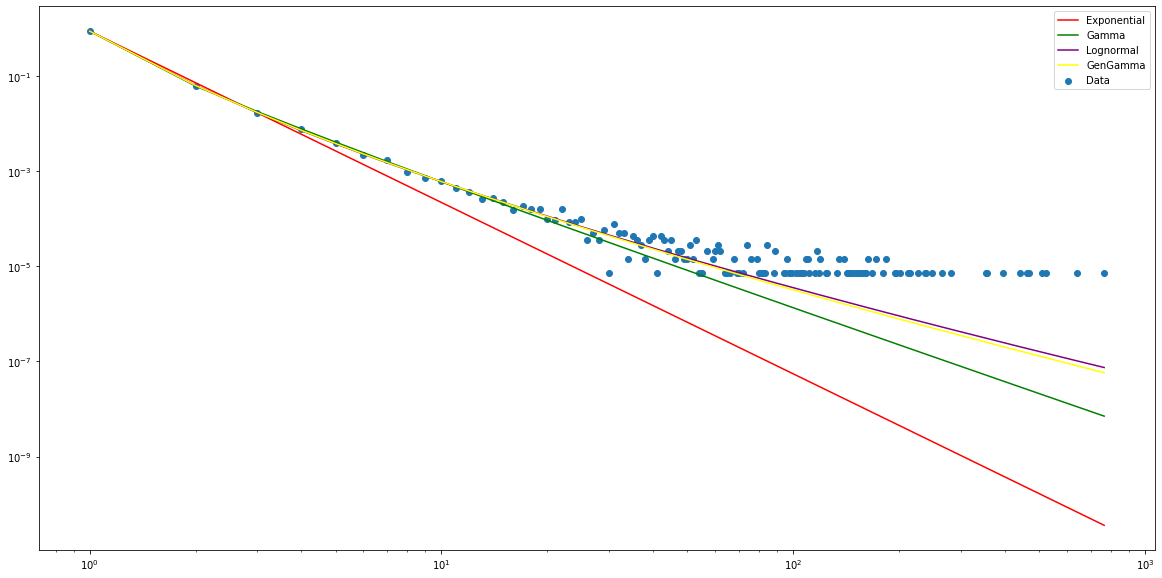

In [152]:
plt.figure(figsize=(20,10))
plt.scatter(x,y, label='Data')
plt.plot(x,exp_sol(x, results_exp.x[0], results_exp.x[1]), c='red', label='Exponential')
plt.plot(x,gamma_sol(x, results_gamma.x[0], results_gamma.x[1], results_gamma.x[2]), c='green', label='Gamma')
plt.plot(x,lognorm_sol(x, results_lognormal.x[0], results_lognormal.x[1], results_lognormal.x[2]), c='purple', label='Lognormal')
plt.plot(x,gengamma_sol(x, results_gg.x[0], results_gg.x[1], results_gg.x[2], results_gg.x[3]), c='yellow', label='GenGamma')
plt.yscale('log')
plt.xscale('log')
#plt.ylim(0.000001,1)
plt.legend()

In [153]:
scores = pd.DataFrame(index = ['Exponential', 'Gamma', 'Lognormal', 'GenGamma'], columns = ['R2', 'LL', 'RMSE'])
scores.loc['Exponential','R2'] = r2_score(y, exp_sol(x, results_exp.x[0], results_exp.x[1]))
scores.loc['Exponential','RMSE'] = np.mean(np.sqrt((y-exp_sol(x, results_exp.x[0], results_exp.x[1]))**2))
yPred =(1/x)*expon.pdf(np.log(x), loc=results_exp.x[0], scale =results_exp.x[1])
scores.loc['Exponential','LL'] =  np.sum( stats.norm.logpdf(yPred, loc=y, scale=np.sqrt(normalizer*y*(1-y))/normalizer ) )


scores.loc['Gamma','R2'] = r2_score(y, gamma_sol(x, results_gamma.x[0], results_gamma.x[1], results_gamma.x[2]))
scores.loc['Gamma','RMSE'] = np.mean(np.sqrt((y-gamma_sol(x, results_gamma.x[0], results_gamma.x[1], results_gamma.x[2]))**2))
yPred =(1/x)*gamma.pdf(np.log(x), a=results_gamma.x[0], loc = results_gamma.x[1], scale = results_gamma.x[2])
scores.loc['Gamma','LL'] = np.sum( stats.norm.logpdf(yPred, loc=y, scale=np.sqrt(normalizer*y*(1-y))/normalizer ) )


scores.loc['GenGamma','R2'] = r2_score(y, gengamma_sol(x, results_gg.x[0], results_gg.x[1], results_gg.x[2], results_gg.x[3]))
scores.loc['GenGamma','RMSE'] = np.mean(np.sqrt((y-gengamma_sol(x, results_gg.x[0], results_gg.x[1], results_gg.x[2], results_gg.x[3]))**2))
yPred =(1/x)*gengamma.pdf(np.log(x), a=results_gg.x[0], c= results_gg.x[1], loc = results_gg.x[2], scale = results_gg.x[3])
scores.loc['GenGamma','LL'] = np.sum( stats.norm.logpdf(yPred, loc=y, scale=np.sqrt(normalizer*y*(1-y))/normalizer ) )


scores.loc['Lognormal','R2'] = r2_score(y, lognorm_sol(x, results_lognormal.x[0], results_lognormal.x[1], results_lognormal.x[2]))
scores.loc['Lognormal','RMSE'] = np.mean(np.sqrt((y-lognorm_sol(x, results_lognormal.x[0], results_lognormal.x[1], results_lognormal.x[2]))**2))
yPred =(1/x)*lognorm.pdf(np.log(x), s=results_lognormal.x[0], loc = results_lognormal.x[1], scale = results_lognormal.x[2])
scores.loc['Lognormal','LL'] = np.sum( stats.norm.logpdf(yPred, loc=y, scale  =np.sqrt(normalizer*y*(1-y))/normalizer ) )

print(scores) 
scores.loc['Gamma','LL']-scores.loc['Lognormal','LL'], scores.loc['Gamma','LL']-scores.loc['GenGamma','LL']

                   R2              LL      RMSE
Exponential  0.999878 -1053577.130821  0.000147
Gamma        0.999997  -616578.764079  0.000034
Lognormal    0.999999 -1807407.601117  0.000022
GenGamma     1.000000     1364.006154  0.000019


(1190828.837038062, -617942.7702325104)

In [154]:
scores.loc['Gamma','LL']-scores.loc['Lognormal','LL'], scores.loc['Gamma','LL']-scores.loc['Exponential','LL']

(1190828.837038062, 436998.3667429446)

In [155]:
results_gamma.x, results_lognormal.x

(array([0.34613261, 0.21190135, 0.68151323]),
 array([0.79746853, 0.50490928, 0.35309344]))

In [156]:
Data = pd.read_pickle('Muziek_meta_nl.pkl')
results['Number of Tweets'].loc['Music','Dutch'] = len(df)
results['Number of Users'].loc['Music','Dutch'] = Data.Screen_Name.nunique()
results['Best Distribution'].loc['Music','Dutch'] = 'Lognormal (17)'
results['Gamma Parameters'].loc['Music','Dutch'] = [0.34613261, 0.21190135, 0.68151323]
results['LogNormal Parameters'].loc['Music','Dutch'] = [0.79746853, 0.50490928, 0.35309344]
results['GenGamma Parameters'].loc['Music','Dutch'] = results_gg.x
del Data

In [157]:
df = pd.read_pickle('Musica_counts_it.pkl')
n = 0
Nf = df[df.Count>n].Count
x= np.array(df[df.Count>n].groupby('Count')['Count'].count().index)
y = df[df.Count>n].groupby('Count')['Count'].count().values/len(df[df.Count>n].Count)

x_int=x
y_int=list()
for i in range(len(x_int)):
    y_int.append(np.sum(y[:i+1]))
    
normalizer=len(df)
normalizer

490764

In [158]:
len(df), np.sum(df['Count'])

(490764, 1016834)

In [159]:
sizes = [len(df.Text.loc[i].split()) for i in df.index]
print(pearsonr(sizes, df['Count'].values))
print(spearmanr(sizes, df['Count'].values))

(0.030338455958937728, 2.7619768044973036e-100)
SpearmanrResult(correlation=0.1461973918796271, pvalue=0.0)


In [160]:
pars_exp,cov_exp = curve_fit(xdata=x, ydata=y, f = exp_sol, maxfev = 800000)
pars_gamma,cov_gamma = curve_fit(xdata=x, ydata=y, f = gamma_sol, maxfev = 800000)
pars_lognormal,cov_lognormal = curve_fit(xdata=x, ydata=y, f = lognorm_sol, maxfev = 800000)
pars_pl,cov_pl = curve_fit(xdata=x, ydata=y, f = pl_sol, maxfev = 80000000)
pars_pln,cov_pln = curve_fit(xdata=x, ydata=y, f = powerlognorm_sol, maxfev = 800000)
pars_beta,cov_beta = curve_fit(xdata=x, ydata=y, f = beta_sol, maxfev = 800000)
pars_gg,cov_gg = curve_fit(xdata=x, ydata=y, f = gengamma_sol, maxfev = 800000)

/home/lilia/venv/sample_environment/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [161]:
initParams_g = pars_gamma
initParams_l = pars_lognormal
initParams_e= pars_exp
initParams_p =[1,1]
initParams_b = pars_beta
initParams_gg = pars_gg



results_gamma = minimize(gamma_, initParams_g, method='Nelder-Mead', options={'maxiter': 10000})
print (results_gamma.x)
results_lognormal = minimize(lognorm_, initParams_l, method='Nelder-Mead', options={'maxiter': 10000})
print(results_lognormal.x)
results_exp = minimize(exp_, initParams_e , method='Nelder-Mead', options={'maxiter': 10000})
print(results_exp.x)
results_PL = minimize(PL_, initParams_p, method='Nelder-Mead', options={'maxiter': 10000})
print(results_PL.x)
results_beta = minimize(beta_, initParams_b, method='Nelder-Mead', options={'maxiter': 10000})
print(results_beta.x)
results_gg = minimize(gengamma_, initParams_gg, method='Nelder-Mead', options={'maxiter': 10000})
print(results_gg.x)

[0.30513665 0.20227548 1.16242819]
[0.98487627 0.4717374  0.36298958]
[0.44262707 0.49744118]
[ 0.82569835 -3.01030548]
[3.03535141e-01 8.84273077e+13 2.01506339e-01 1.03250991e+14]
[ 6.65087368e+01  1.15147913e-01 -4.39767836e-01  5.09468147e-17]


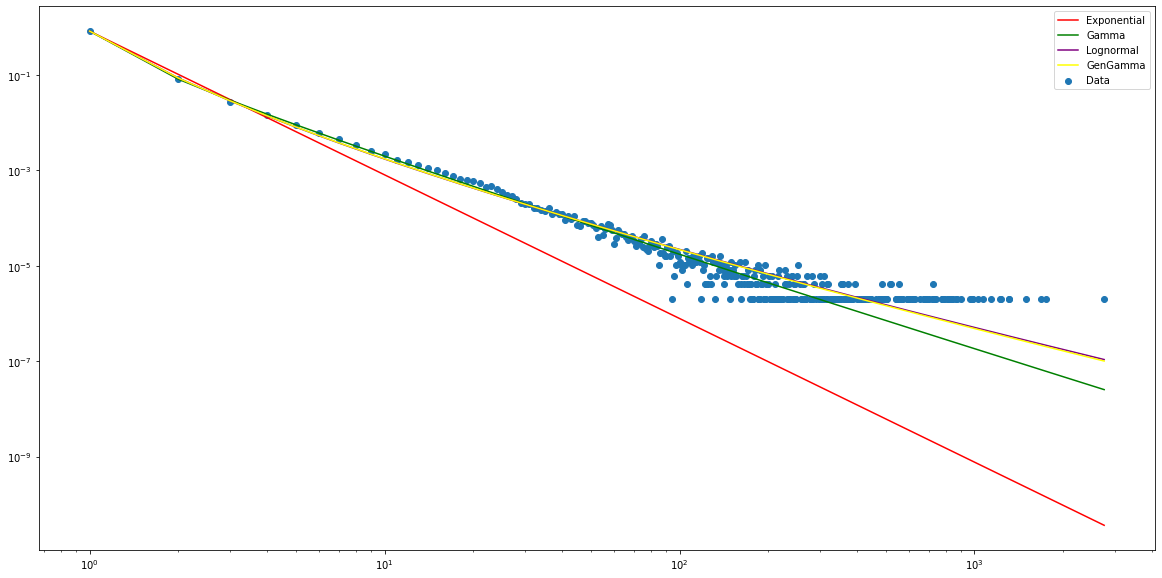

In [162]:
plt.figure(figsize=(20,10))
plt.scatter(x,y, label='Data')
plt.plot(x,exp_sol(x, results_exp.x[0], results_exp.x[1]), c='red', label='Exponential')
plt.plot(x,gamma_sol(x, results_gamma.x[0], results_gamma.x[1], results_gamma.x[2]), c='green', label='Gamma')
plt.plot(x,lognorm_sol(x, results_lognormal.x[0], results_lognormal.x[1], results_lognormal.x[2]), c='purple', label='Lognormal')
plt.plot(x,gengamma_sol(x, results_gg.x[0], results_gg.x[1], results_gg.x[2], results_gg.x[3]), c='yellow', label='GenGamma')
plt.yscale('log')
plt.xscale('log')
#plt.ylim(0.000001,1)
plt.legend()

In [163]:
scores = pd.DataFrame(index = ['Exponential', 'Gamma', 'Lognormal', 'GenGamma'], columns = ['R2', 'LL', 'RMSE'])
scores.loc['Exponential','R2'] = r2_score(y, exp_sol(x, results_exp.x[0], results_exp.x[1]))
scores.loc['Exponential','RMSE'] = np.mean(np.sqrt((y-exp_sol(x, results_exp.x[0], results_exp.x[1]))**2))
yPred =(1/x)*expon.pdf(np.log(x), loc=results_exp.x[0], scale =results_exp.x[1])
scores.loc['Exponential','LL'] =  np.sum( stats.norm.logpdf(yPred, loc=y, scale=np.sqrt(normalizer*y*(1-y))/normalizer ) )


scores.loc['Gamma','R2'] = r2_score(y, gamma_sol(x, results_gamma.x[0], results_gamma.x[1], results_gamma.x[2]))
scores.loc['Gamma','RMSE'] = np.mean(np.sqrt((y-gamma_sol(x, results_gamma.x[0], results_gamma.x[1], results_gamma.x[2]))**2))
yPred =(1/x)*gamma.pdf(np.log(x), a=results_gamma.x[0], loc = results_gamma.x[1], scale = results_gamma.x[2])
scores.loc['Gamma','LL'] = np.sum( stats.norm.logpdf(yPred, loc=y, scale=np.sqrt(normalizer*y*(1-y))/normalizer ) )


scores.loc['GenGamma','R2'] = r2_score(y, gengamma_sol(x, results_gg.x[0], results_gg.x[1], results_gg.x[2], results_gg.x[3]))
scores.loc['GenGamma','RMSE'] = np.mean(np.sqrt((y-gengamma_sol(x, results_gg.x[0], results_gg.x[1], results_gg.x[2], results_gg.x[3]))**2))
yPred =(1/x)*gengamma.pdf(np.log(x), a=results_gg.x[0], c= results_gg.x[1], loc = results_gg.x[2], scale = results_gg.x[3])
scores.loc['GenGamma','LL'] = np.sum( stats.norm.logpdf(yPred, loc=y, scale=np.sqrt(normalizer*y*(1-y))/normalizer ) )


scores.loc['Lognormal','R2'] = r2_score(y, lognorm_sol(x, results_lognormal.x[0], results_lognormal.x[1], results_lognormal.x[2]))
scores.loc['Lognormal','RMSE'] = np.mean(np.sqrt((y-lognorm_sol(x, results_lognormal.x[0], results_lognormal.x[1], results_lognormal.x[2]))**2))
yPred =(1/x)*lognorm.pdf(np.log(x), s=results_lognormal.x[0], loc = results_lognormal.x[1], scale = results_lognormal.x[2])
scores.loc['Lognormal','LL'] = np.sum( stats.norm.logpdf(yPred, loc=y, scale  =np.sqrt(normalizer*y*(1-y))/normalizer ) )

print(scores) 
scores.loc['Gamma','LL']-scores.loc['Lognormal','LL'], scores.loc['Gamma','LL']-scores.loc['GenGamma','LL']

                   R2              LL      RMSE
Exponential  0.999321 -2403267.829968  0.000149
Gamma        0.999993 -1226512.306403  0.000017
Lognormal    0.999967 -3227532.082704  0.000039
GenGamma     0.999971     3526.931492  0.000037


(2001019.7763008894, -1230039.2378947283)

In [164]:
scores.loc['Gamma','LL']-scores.loc['Lognormal','LL'], scores.loc['Gamma','LL']-scores.loc['Exponential','LL']

(2001019.7763008894, 1176755.5235652677)

In [165]:
results_gamma.x, results_lognormal.x

(array([0.30513665, 0.20227548, 1.16242819]),
 array([0.98487627, 0.4717374 , 0.36298958]))

In [166]:
Data = pd.read_pickle('Musica_meta_it.pkl')
results['Number of Tweets'].loc['Music','Italian'] = len(df)
results['Number of Users'].loc['Music','Italian'] = Data.Screen_Name.nunique()
results['Best Distribution'].loc['Music','Italian'] = 'Lognormal (463)'
results['Gamma Parameters'].loc['Music','Italian'] = [0.30513665, 0.20227548, 1.16242819]
results['LogNormal Parameters'].loc['Music','Italian'] = [0.30513665, 0.20227548, 1.16242819]
results['GenGamma Parameters'].loc['Music','Italian'] = results_gg.x
del Data

In [167]:
df = pd.read_pickle('Musik_counts_de.pkl')
n = 0
Nf = df[df.Count>n].Count
x= np.array(df[df.Count>n].groupby('Count')['Count'].count().index)
y = df[df.Count>n].groupby('Count')['Count'].count().values/len(df[df.Count>n].Count)

x_int=x
y_int=list()
for i in range(len(x_int)):
    y_int.append(np.sum(y[:i+1]))
    
normalizer=len(df)
normalizer

324803

In [168]:
len(df), np.sum(df['Count'])

(324803, 447831)

In [169]:
sizes = [len(df.Text.loc[i].split()) for i in df.index]
print(pearsonr(sizes, df['Count'].values))
print(spearmanr(sizes, df['Count'].values))

(0.01778747390864104, 3.7427249634772446e-24)
SpearmanrResult(correlation=0.09090572607751096, pvalue=0.0)


In [170]:
pars_exp,cov_exp = curve_fit(xdata=x, ydata=y, f = exp_sol, maxfev = 800000)
pars_gamma,cov_gamma = curve_fit(xdata=x, ydata=y, f = gamma_sol, maxfev = 800000)
pars_lognormal,cov_lognormal = curve_fit(xdata=x, ydata=y, f = lognorm_sol, maxfev = 800000)
pars_pl,cov_pl = curve_fit(xdata=x, ydata=y, f = pl_sol, maxfev = 80000000)
pars_pln,cov_pln = curve_fit(xdata=x, ydata=y, f = powerlognorm_sol, maxfev = 800000)
pars_beta,cov_beta = curve_fit(xdata=x, ydata=y, f = beta_sol, maxfev = 800000)
pars_gg,cov_gg = curve_fit(xdata=x, ydata=y, f = gengamma_sol, maxfev = 800000)

/home/lilia/venv/sample_environment/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [171]:
initParams_g = pars_gamma
initParams_l = pars_lognormal
initParams_e= pars_exp
initParams_p =[1,1]
initParams_b = pars_beta
initParams_gg = pars_gg



results_gamma = minimize(gamma_, initParams_g, method='Nelder-Mead', options={'maxiter': 10000})
print (results_gamma.x)
results_lognormal = minimize(lognorm_, initParams_l, method='Nelder-Mead', options={'maxiter': 10000})
print(results_lognormal.x)
results_exp = minimize(exp_, initParams_e , method='Nelder-Mead', options={'maxiter': 10000})
print(results_exp.x)
results_PL = minimize(PL_, initParams_p, method='Nelder-Mead', options={'maxiter': 10000})
print(results_PL.x)
results_beta = minimize(beta_, initParams_b, method='Nelder-Mead', options={'maxiter': 10000})
print(results_beta.x)
results_gg = minimize(gengamma_, initParams_gg, method='Nelder-Mead', options={'maxiter': 10000})
print(results_gg.x)

[0.24837645 0.16721943 0.84278742]
[0.92321563 0.42787877 0.27400049]
[0.4080291  0.37339381]
[ 0.89794974 -3.67817451]
[  0.25249522 135.37561224   0.16911535 112.10522497]
[ 0.25062588  0.99677938 -0.16779452  0.83730292]


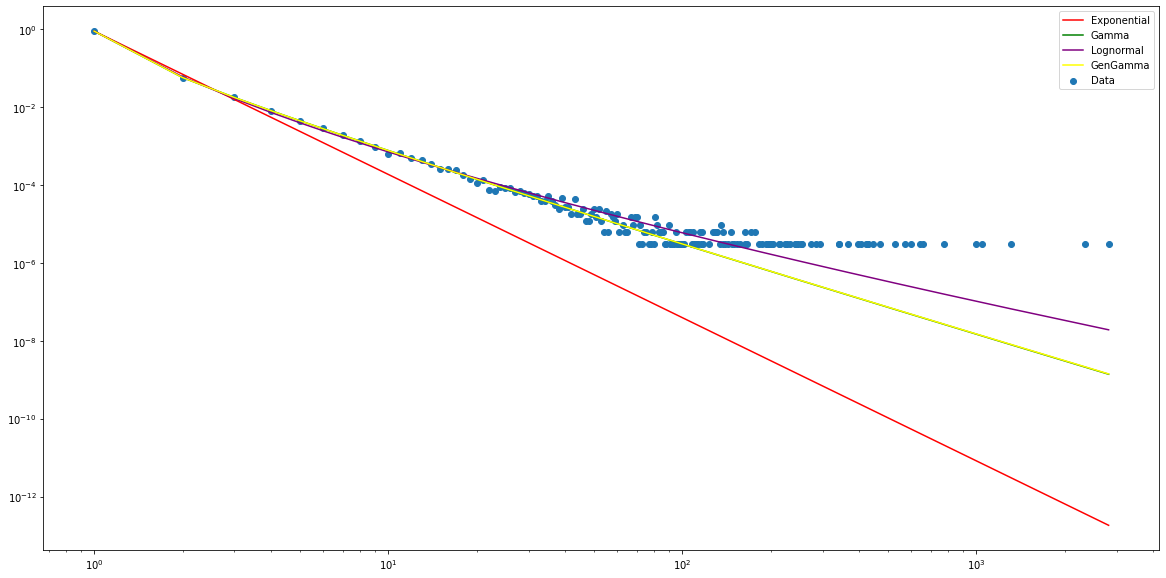

In [172]:
plt.figure(figsize=(20,10))
plt.scatter(x,y, label='Data')
plt.plot(x,exp_sol(x, results_exp.x[0], results_exp.x[1]), c='red', label='Exponential')
plt.plot(x,gamma_sol(x, results_gamma.x[0], results_gamma.x[1], results_gamma.x[2]), c='green', label='Gamma')
plt.plot(x,lognorm_sol(x, results_lognormal.x[0], results_lognormal.x[1], results_lognormal.x[2]), c='purple', label='Lognormal')
plt.plot(x,gengamma_sol(x, results_gg.x[0], results_gg.x[1], results_gg.x[2], results_gg.x[3]), c='yellow', label='GenGamma')
plt.yscale('log')
plt.xscale('log')
#plt.ylim(0.000001,1)
plt.legend()

In [173]:
scores = pd.DataFrame(index = ['Exponential', 'Gamma', 'Lognormal', 'GenGamma'], columns = ['R2', 'LL', 'RMSE'])
scores.loc['Exponential','R2'] = r2_score(y, exp_sol(x, results_exp.x[0], results_exp.x[1]))
scores.loc['Exponential','RMSE'] = np.mean(np.sqrt((y-exp_sol(x, results_exp.x[0], results_exp.x[1]))**2))
yPred =(1/x)*expon.pdf(np.log(x), loc=results_exp.x[0], scale =results_exp.x[1])
scores.loc['Exponential','LL'] =  np.sum( stats.norm.logpdf(yPred, loc=y, scale=np.sqrt(normalizer*y*(1-y))/normalizer ) )


scores.loc['Gamma','R2'] = r2_score(y, gamma_sol(x, results_gamma.x[0], results_gamma.x[1], results_gamma.x[2]))
scores.loc['Gamma','RMSE'] = np.mean(np.sqrt((y-gamma_sol(x, results_gamma.x[0], results_gamma.x[1], results_gamma.x[2]))**2))
yPred =(1/x)*gamma.pdf(np.log(x), a=results_gamma.x[0], loc = results_gamma.x[1], scale = results_gamma.x[2])
scores.loc['Gamma','LL'] = np.sum( stats.norm.logpdf(yPred, loc=y, scale=np.sqrt(normalizer*y*(1-y))/normalizer ) )


scores.loc['GenGamma','R2'] = r2_score(y, gengamma_sol(x, results_gg.x[0], results_gg.x[1], results_gg.x[2], results_gg.x[3]))
scores.loc['GenGamma','RMSE'] = np.mean(np.sqrt((y-gengamma_sol(x, results_gg.x[0], results_gg.x[1], results_gg.x[2], results_gg.x[3]))**2))
yPred =(1/x)*gengamma.pdf(np.log(x), a=results_gg.x[0], c= results_gg.x[1], loc = results_gg.x[2], scale = results_gg.x[3])
scores.loc['GenGamma','LL'] = np.sum( stats.norm.logpdf(yPred, loc=y, scale=np.sqrt(normalizer*y*(1-y))/normalizer ) )


scores.loc['Lognormal','R2'] = r2_score(y, lognorm_sol(x, results_lognormal.x[0], results_lognormal.x[1], results_lognormal.x[2]))
scores.loc['Lognormal','RMSE'] = np.mean(np.sqrt((y-lognorm_sol(x, results_lognormal.x[0], results_lognormal.x[1], results_lognormal.x[2]))**2))
yPred =(1/x)*lognorm.pdf(np.log(x), s=results_lognormal.x[0], loc = results_lognormal.x[1], scale = results_lognormal.x[2])
scores.loc['Lognormal','LL'] = np.sum( stats.norm.logpdf(yPred, loc=y, scale  =np.sqrt(normalizer*y*(1-y))/normalizer ) )

print(scores) 
scores.loc['Gamma','LL']-scores.loc['Lognormal','LL'], scores.loc['Gamma','LL']-scores.loc['GenGamma','LL']

                   R2              LL      RMSE
Exponential  0.999771 -2592550.020185  0.000176
Gamma        1.000000 -1459504.549907  0.000009
Lognormal    0.999988 -3333308.007611  0.000042
GenGamma     1.000000     1828.306697  0.000009


(1873803.457703161, -1461332.8566048562)

In [174]:
scores.loc['Gamma','LL']-scores.loc['Lognormal','LL'], scores.loc['Gamma','LL']-scores.loc['Exponential','LL']

(1873803.457703161, 1133045.470277418)

In [175]:
results_gamma.x, results_lognormal.x

(array([0.24837645, 0.16721943, 0.84278742]),
 array([0.92321563, 0.42787877, 0.27400049]))

In [176]:
Data = pd.read_pickle('Musik_meta_de.pkl')
results['Number of Tweets'].loc['Music','German'] = len(df)
results['Number of Users'].loc['Music','German'] = Data.Screen_Name.nunique()
results['Best Distribution'].loc['Music','German'] = 'Gamma (100)'
results['Gamma Parameters'].loc['Music','German'] = [0.24837645, 0.16721943, 0.84278742]
results['LogNormal Parameters'].loc['Music','German'] = [0.92321563, 0.42787877, 0.27400049]
results['GenGamma Parameters'].loc['Music','German'] = results_gg.x
del Data

In [177]:
len(df), np.sum(df['Count'])

(324803, 447831)

In [178]:
df = pd.read_pickle('Musica_counts_pt.pkl')
n = 0
Nf = df[df.Count>n].Count
x= np.array(df[df.Count>n].groupby('Count')['Count'].count().index)
y = df[df.Count>n].groupby('Count')['Count'].count().values/len(df[df.Count>n].Count)

x_int=x
y_int=list()
for i in range(len(x_int)):
    y_int.append(np.sum(y[:i+1]))
    
normalizer=len(df)
normalizer

13251392

In [179]:
len(df), np.sum(df['Count'])

(13251392, 24375572)

In [180]:
sizes = [len(df.Text.loc[i].split()) for i in df.index]
print(pearsonr(sizes, df['Count'].values))
print(spearmanr(sizes, df['Count'].values))

(0.01253006068405573, 0.0)
SpearmanrResult(correlation=0.1087096992458946, pvalue=0.0)


In [181]:
pars_exp,cov_exp = curve_fit(xdata=x, ydata=y, f = exp_sol, maxfev = 800000)
pars_gamma,cov_gamma = curve_fit(xdata=x, ydata=y, f = gamma_sol, maxfev = 800000)
pars_lognormal,cov_lognormal = curve_fit(xdata=x, ydata=y, f = lognorm_sol, maxfev = 800000)
pars_pl,cov_pl = curve_fit(xdata=x, ydata=y, f = pl_sol, maxfev = 80000000)
pars_pln,cov_pln = curve_fit(xdata=x, ydata=y, f = powerlognorm_sol, maxfev = 800000)
pars_beta,cov_beta = curve_fit(xdata=x, ydata=y, f = beta_sol, maxfev = 800000)
pars_gg,cov_gg = curve_fit(xdata=x, ydata=y, f = gengamma_sol, maxfev = 800000)

/home/lilia/venv/sample_environment/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [182]:
initParams_g = pars_gamma
initParams_l = pars_lognormal
initParams_e= pars_exp
initParams_p =[1,1]
initParams_b = pars_beta
initParams_gg = pars_gg



results_gamma = minimize(gamma_, initParams_g, method='Nelder-Mead', options={'maxiter': 10000})
print (results_gamma.x)
results_lognormal = minimize(lognorm_, initParams_l, method='Nelder-Mead', options={'maxiter': 10000})
print(results_lognormal.x)
results_exp = minimize(exp_, initParams_e , method='Nelder-Mead', options={'maxiter': 10000})
print(results_exp.x)
results_PL = minimize(PL_, initParams_p, method='Nelder-Mead', options={'maxiter': 10000})
print(results_PL.x)
results_beta = minimize(beta_, initParams_b, method='Nelder-Mead', options={'maxiter': 10000})
print(results_beta.x)
results_gg = minimize(gengamma_, initParams_gg, method='Nelder-Mead', options={'maxiter': 10000})
print(results_gg.x)

[0.10554497 0.08456082 1.32430585]
[1.30371109 0.26721601 0.1134458 ]
[0.38872563 0.31247186]
[ 0.9223834  -4.20028056]
[2.82949942e+02 2.16646438e+00 4.19206274e-01 1.66831247e-03]
[ 6.86765175e+01  8.49343427e-02 -2.50439875e-01  2.47346995e-23]


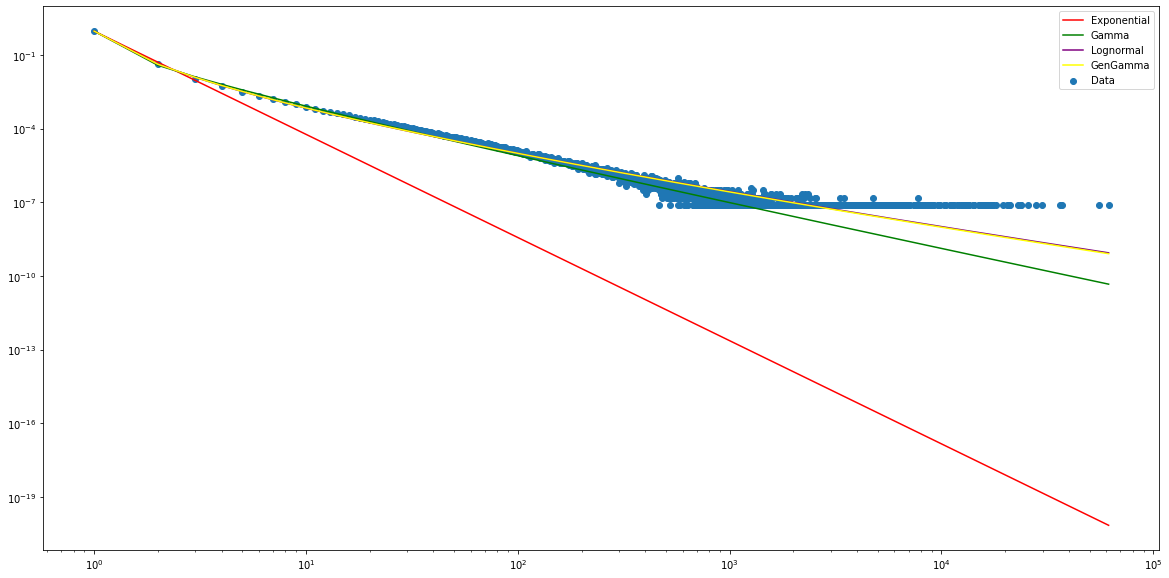

In [183]:
plt.figure(figsize=(20,10))
plt.scatter(x,y, label='Data')
plt.plot(x,exp_sol(x, results_exp.x[0], results_exp.x[1]), c='red', label='Exponential')
plt.plot(x,gamma_sol(x, results_gamma.x[0], results_gamma.x[1], results_gamma.x[2]), c='green', label='Gamma')
plt.plot(x,lognorm_sol(x, results_lognormal.x[0], results_lognormal.x[1], results_lognormal.x[2]), c='purple', label='Lognormal')
plt.plot(x,gengamma_sol(x, results_gg.x[0], results_gg.x[1], results_gg.x[2], results_gg.x[3]), c='yellow', label='GenGamma')
plt.yscale('log')
plt.xscale('log')
#plt.ylim(0.000001,1)
plt.legend()

In [184]:
scores = pd.DataFrame(index = ['Exponential', 'Gamma', 'Lognormal', 'GenGamma'], columns = ['R2', 'LL', 'RMSE'])
scores.loc['Exponential','R2'] = r2_score(y, exp_sol(x, results_exp.x[0], results_exp.x[1]))
scores.loc['Exponential','RMSE'] = np.mean(np.sqrt((y-exp_sol(x, results_exp.x[0], results_exp.x[1]))**2))
yPred =(1/x)*expon.pdf(np.log(x), loc=results_exp.x[0], scale =results_exp.x[1])
scores.loc['Exponential','LL'] =  np.sum( stats.norm.logpdf(yPred, loc=y, scale=np.sqrt(normalizer*y*(1-y))/normalizer ) )


scores.loc['Gamma','R2'] = r2_score(y, gamma_sol(x, results_gamma.x[0], results_gamma.x[1], results_gamma.x[2]))
scores.loc['Gamma','RMSE'] = np.mean(np.sqrt((y-gamma_sol(x, results_gamma.x[0], results_gamma.x[1], results_gamma.x[2]))**2))
yPred =(1/x)*gamma.pdf(np.log(x), a=results_gamma.x[0], loc = results_gamma.x[1], scale = results_gamma.x[2])
scores.loc['Gamma','LL'] = np.sum( stats.norm.logpdf(yPred, loc=y, scale=np.sqrt(normalizer*y*(1-y))/normalizer ) )


scores.loc['GenGamma','R2'] = r2_score(y, gengamma_sol(x, results_gg.x[0], results_gg.x[1], results_gg.x[2], results_gg.x[3]))
scores.loc['GenGamma','RMSE'] = np.mean(np.sqrt((y-gengamma_sol(x, results_gg.x[0], results_gg.x[1], results_gg.x[2], results_gg.x[3]))**2))
yPred =(1/x)*gengamma.pdf(np.log(x), a=results_gg.x[0], c= results_gg.x[1], loc = results_gg.x[2], scale = results_gg.x[3])
scores.loc['GenGamma','LL'] = np.sum( stats.norm.logpdf(yPred, loc=y, scale=np.sqrt(normalizer*y*(1-y))/normalizer ) )


scores.loc['Lognormal','R2'] = r2_score(y, lognorm_sol(x, results_lognormal.x[0], results_lognormal.x[1], results_lognormal.x[2]))
scores.loc['Lognormal','RMSE'] = np.mean(np.sqrt((y-lognorm_sol(x, results_lognormal.x[0], results_lognormal.x[1], results_lognormal.x[2]))**2))
yPred =(1/x)*lognorm.pdf(np.log(x), s=results_lognormal.x[0], loc = results_lognormal.x[1], scale = results_lognormal.x[2])
scores.loc['Lognormal','LL'] = np.sum( stats.norm.logpdf(yPred, loc=y, scale  =np.sqrt(normalizer*y*(1-y))/normalizer ) )

print(scores) 
scores.loc['Gamma','LL']-scores.loc['Lognormal','LL'], scores.loc['Gamma','LL']-scores.loc['GenGamma','LL']

                   R2                LL      RMSE
Exponential  0.999908 -137825021.255780  0.000016
Gamma        0.999963  -79202719.911227  0.000007
Lognormal    0.999996  -84633976.392056  0.000003
GenGamma     0.999995      17854.377853  0.000003


(5431256.480828404, -79220574.28908043)

In [185]:
scores.loc['Gamma','LL']-scores.loc['Lognormal','LL'], scores.loc['Gamma','LL']-scores.loc['Exponential','LL']

(5431256.480828404, 58622301.344552964)

In [186]:
results_gamma.x, results_lognormal.x

(array([0.10554497, 0.08456082, 1.32430585]),
 array([1.30371109, 0.26721601, 0.1134458 ]))

In [187]:
Data = pd.read_pickle('Musica_meta_pt.pkl')
results['Number of Tweets'].loc['Music','Portuguese'] = len(df)
results['Number of Users'].loc['Music','Portuguese'] = Data.Screen_Name.nunique()
results['Best Distribution'].loc['Music','Portuguese'] = 'Lognormal (5244)'
results['Gamma Parameters'].loc['Music','Portuguese'] = [0.10554497, 0.08456082, 1.32430585]
results['LogNormal Parameters'].loc['Music','Portuguese'] = [1.30371109, 0.26721601, 0.1134458 ]
results['GenGamma Parameters'].loc['Music','Portuguese'] = results_gg.x
del Data

## Film

In [188]:
df = pd.read_pickle('Film_counts_nl.pkl')
n = 0
Nf = df[df.Count>n].Count
x= np.array(df[df.Count>n].groupby('Count')['Count'].count().index)
y = df[df.Count>n].groupby('Count')['Count'].count().values/len(df[df.Count>n].Count)

x_int=x
y_int=list()
for i in range(len(x_int)):
    y_int.append(np.sum(y[:i+1]))
    
normalizer=len(df)
normalizer

115969

In [189]:
len(df), np.sum(df['Count'])

(115969, 186972)

In [190]:
sizes = [len(df.Text.loc[i].split()) for i in df.index]
print(pearsonr(sizes, df['Count'].values))
print(spearmanr(sizes, df['Count'].values))

(-0.0011222150570001242, 0.7023444682643942)
SpearmanrResult(correlation=0.14605586630743156, pvalue=0.0)


In [191]:
pars_exp,cov_exp = curve_fit(xdata=x, ydata=y, f = exp_sol, maxfev = 800000)
pars_gamma,cov_gamma = curve_fit(xdata=x, ydata=y, f = gamma_sol, maxfev = 800000)
pars_lognormal,cov_lognormal = curve_fit(xdata=x, ydata=y, f = lognorm_sol, maxfev = 800000)
pars_pl,cov_pl = curve_fit(xdata=x, ydata=y, f = pl_sol, maxfev = 80000000)
pars_pln,cov_pln = curve_fit(xdata=x, ydata=y, f = powerlognorm_sol, maxfev = 800000)
pars_beta,cov_beta = curve_fit(xdata=x, ydata=y, f = beta_sol, maxfev = 800000)
pars_gg,cov_gg = curve_fit(xdata=x, ydata=y, f = gengamma_sol, maxfev = 800000)

/home/lilia/venv/sample_environment/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [192]:
initParams_g = pars_gamma
initParams_l = pars_lognormal
initParams_e= pars_exp
initParams_p =[1,1]
initParams_b = pars_beta
initParams_gg = pars_gg



results_gamma = minimize(gamma_, initParams_g, method='Nelder-Mead', options={'maxiter': 10000})
print (results_gamma.x)
results_lognormal = minimize(lognorm_, initParams_l, method='Nelder-Mead', options={'maxiter': 10000})
print(results_lognormal.x)
results_exp = minimize(exp_, initParams_e , method='Nelder-Mead', options={'maxiter': 10000})
print(results_exp.x)
results_PL = minimize(PL_, initParams_p, method='Nelder-Mead', options={'maxiter': 10000})
print(results_PL.x)
results_beta = minimize(beta_, initParams_b, method='Nelder-Mead', options={'maxiter': 10000})
print(results_beta.x)
results_gg = minimize(gengamma_, initParams_gg, method='Nelder-Mead', options={'maxiter': 10000})
print(results_gg.x)

[0.22251094 0.15384843 0.87614813]
[0.99044335 0.39107447 0.23525351]
[0.40521768 0.36287598]
[ 0.9021348  -3.75579413]
[8.51456683 3.05175141 0.53158273 0.12440699]
[ 3.67400355  0.3824408  -0.29701632  0.0061591 ]


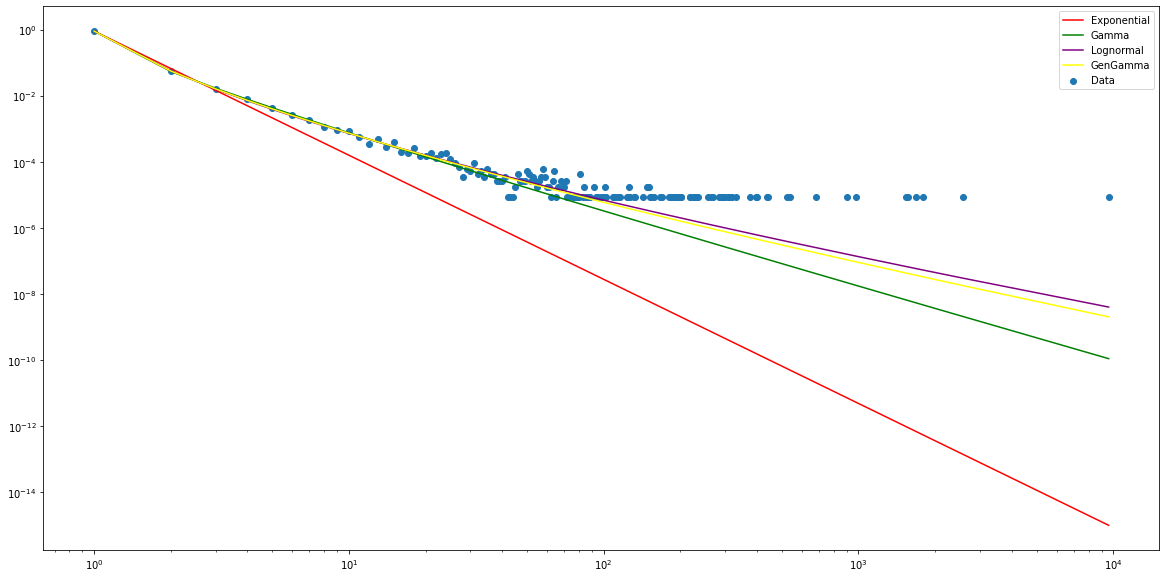

In [193]:
plt.figure(figsize=(20,10))
plt.scatter(x,y, label='Data')
plt.plot(x,exp_sol(x, results_exp.x[0], results_exp.x[1]), c='red', label='Exponential')
plt.plot(x,gamma_sol(x, results_gamma.x[0], results_gamma.x[1], results_gamma.x[2]), c='green', label='Gamma')
plt.plot(x,lognorm_sol(x, results_lognormal.x[0], results_lognormal.x[1], results_lognormal.x[2]), c='purple', label='Lognormal')
plt.plot(x,gengamma_sol(x, results_gg.x[0], results_gg.x[1], results_gg.x[2], results_gg.x[3]), c='yellow', label='GenGamma')
plt.yscale('log')
plt.xscale('log')
#plt.ylim(0.000001,1)
plt.legend()

In [194]:
scores = pd.DataFrame(index = ['Exponential', 'Gamma', 'Lognormal', 'GenGamma'], columns = ['R2', 'LL', 'RMSE'])
scores.loc['Exponential','R2'] = r2_score(y, exp_sol(x, results_exp.x[0], results_exp.x[1]))
scores.loc['Exponential','RMSE'] = np.mean(np.sqrt((y-exp_sol(x, results_exp.x[0], results_exp.x[1]))**2))
yPred =(1/x)*expon.pdf(np.log(x), loc=results_exp.x[0], scale =results_exp.x[1])
scores.loc['Exponential','LL'] =  np.sum( stats.norm.logpdf(yPred, loc=y, scale=np.sqrt(normalizer*y*(1-y))/normalizer ) )


scores.loc['Gamma','R2'] = r2_score(y, gamma_sol(x, results_gamma.x[0], results_gamma.x[1], results_gamma.x[2]))
scores.loc['Gamma','RMSE'] = np.mean(np.sqrt((y-gamma_sol(x, results_gamma.x[0], results_gamma.x[1], results_gamma.x[2]))**2))
yPred =(1/x)*gamma.pdf(np.log(x), a=results_gamma.x[0], loc = results_gamma.x[1], scale = results_gamma.x[2])
scores.loc['Gamma','LL'] = np.sum( stats.norm.logpdf(yPred, loc=y, scale=np.sqrt(normalizer*y*(1-y))/normalizer ) )


scores.loc['GenGamma','R2'] = r2_score(y, gengamma_sol(x, results_gg.x[0], results_gg.x[1], results_gg.x[2], results_gg.x[3]))
scores.loc['GenGamma','RMSE'] = np.mean(np.sqrt((y-gengamma_sol(x, results_gg.x[0], results_gg.x[1], results_gg.x[2], results_gg.x[3]))**2))
yPred =(1/x)*gengamma.pdf(np.log(x), a=results_gg.x[0], c= results_gg.x[1], loc = results_gg.x[2], scale = results_gg.x[3])
scores.loc['GenGamma','LL'] = np.sum( stats.norm.logpdf(yPred, loc=y, scale=np.sqrt(normalizer*y*(1-y))/normalizer ) )


scores.loc['Lognormal','R2'] = r2_score(y, lognorm_sol(x, results_lognormal.x[0], results_lognormal.x[1], results_lognormal.x[2]))
scores.loc['Lognormal','RMSE'] = np.mean(np.sqrt((y-lognorm_sol(x, results_lognormal.x[0], results_lognormal.x[1], results_lognormal.x[2]))**2))
yPred =(1/x)*lognorm.pdf(np.log(x), s=results_lognormal.x[0], loc = results_lognormal.x[1], scale = results_lognormal.x[2])
scores.loc['Lognormal','LL'] = np.sum( stats.norm.logpdf(yPred, loc=y, scale  =np.sqrt(normalizer*y*(1-y))/normalizer ) )

print(scores) 
scores.loc['Gamma','LL']-scores.loc['Lognormal','LL'], scores.loc['Gamma','LL']-scores.loc['GenGamma','LL']

                   R2             LL      RMSE
Exponential  0.999814 -964295.202775  0.000191
Gamma        0.999997 -542420.380639  0.000032
Lognormal    0.999997 -962393.784037  0.000032
GenGamma     0.999999    1485.129602  0.000027


(419973.40339741297, -543905.5102415499)

In [195]:
scores.loc['Gamma','LL']-scores.loc['Lognormal','LL'], scores.loc['Gamma','LL']-scores.loc['Exponential','LL']

(419973.40339741297, 421874.822135975)

In [196]:
results_gamma.x, results_lognormal.x

(array([0.22251094, 0.15384843, 0.87614813]),
 array([0.99044335, 0.39107447, 0.23525351]))

In [197]:
Data = pd.read_pickle('Film_meta_nl.pkl')
results['Number of Tweets'].loc['Film','Dutch'] = len(df)
results['Number of Users'].loc['Film','Dutch'] = Data.Screen_Name.nunique()
results['Best Distribution'].loc['Film','Dutch'] = 'Lognormal (1)'
results['Gamma Parameters'].loc['Film','Dutch'] = [0.22251094, 0.15384843, 0.87614813]
results['LogNormal Parameters'].loc['Film','Dutch'] = [0.99044335, 0.39107447, 0.23525351]
results['GenGamma Parameters'].loc['Film','Dutch'] = results_gg.x
del Data

In [198]:
df = pd.read_pickle('Filme_counts_it.pkl')
n = 0
Nf = df[df.Count>n].Count
x= np.array(df[df.Count>n].groupby('Count')['Count'].count().index)
y = df[df.Count>n].groupby('Count')['Count'].count().values/len(df[df.Count>n].Count)

x_int=x
y_int=list()
for i in range(len(x_int)):
    y_int.append(np.sum(y[:i+1]))
    
normalizer=len(df)
normalizer

638865

In [199]:
len(df), np.sum(df['Count'])

(638865, 995971)

In [200]:
sizes = [len(df.Text.loc[i].split()) for i in df.index]
print(pearsonr(sizes, df['Count'].values))
print(spearmanr(sizes, df['Count'].values))

(0.027899963552886133, 3.343864231963644e-110)
SpearmanrResult(correlation=0.1277856335931689, pvalue=0.0)


In [201]:
pars_exp,cov_exp = curve_fit(xdata=x, ydata=y, f = exp_sol, maxfev = 800000)
pars_gamma,cov_gamma = curve_fit(xdata=x, ydata=y, f = gamma_sol, maxfev = 800000)
pars_lognormal,cov_lognormal = curve_fit(xdata=x, ydata=y, f = lognorm_sol, maxfev = 800000)
pars_pl,cov_pl = curve_fit(xdata=x, ydata=y, f = pl_sol, maxfev = 80000000)
pars_pln,cov_pln = curve_fit(xdata=x, ydata=y, f = powerlognorm_sol, maxfev = 800000)
pars_beta,cov_beta = curve_fit(xdata=x, ydata=y, f = beta_sol, maxfev = 800000)
pars_gg,cov_gg = curve_fit(xdata=x, ydata=y, f = gengamma_sol, maxfev = 800000)

/home/lilia/venv/sample_environment/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [202]:
initParams_g = pars_gamma
initParams_l = pars_lognormal
initParams_e= pars_exp
initParams_p =[1,1]
initParams_b = pars_beta
initParams_gg = pars_gg



results_gamma = minimize(gamma_, initParams_g, method='Nelder-Mead', options={'maxiter': 10000})
print (results_gamma.x)
results_lognormal = minimize(lognorm_, initParams_l, method='Nelder-Mead', options={'maxiter': 10000})
print(results_lognormal.x)
results_exp = minimize(exp_, initParams_e , method='Nelder-Mead', options={'maxiter': 10000})
print(results_exp.x)
results_PL = minimize(PL_, initParams_p, method='Nelder-Mead', options={'maxiter': 10000})
print(results_PL.x)
results_beta = minimize(beta_, initParams_b, method='Nelder-Mead', options={'maxiter': 10000})
print(results_beta.x)
results_gg = minimize(gengamma_, initParams_gg, method='Nelder-Mead', options={'maxiter': 10000})
print(results_gg.x)

[0.21512098 0.15133996 1.01972824]
[1.03732008 0.38809207 0.23935652]
[0.41327359 0.38577813]
[ 0.88800558 -3.59219065]
[1.66762628e+02 2.81711907e+00 5.87781848e-01 6.55277808e-03]
[ 9.68985035e+01  9.12218125e-02 -3.66149428e-01  3.80128863e-23]


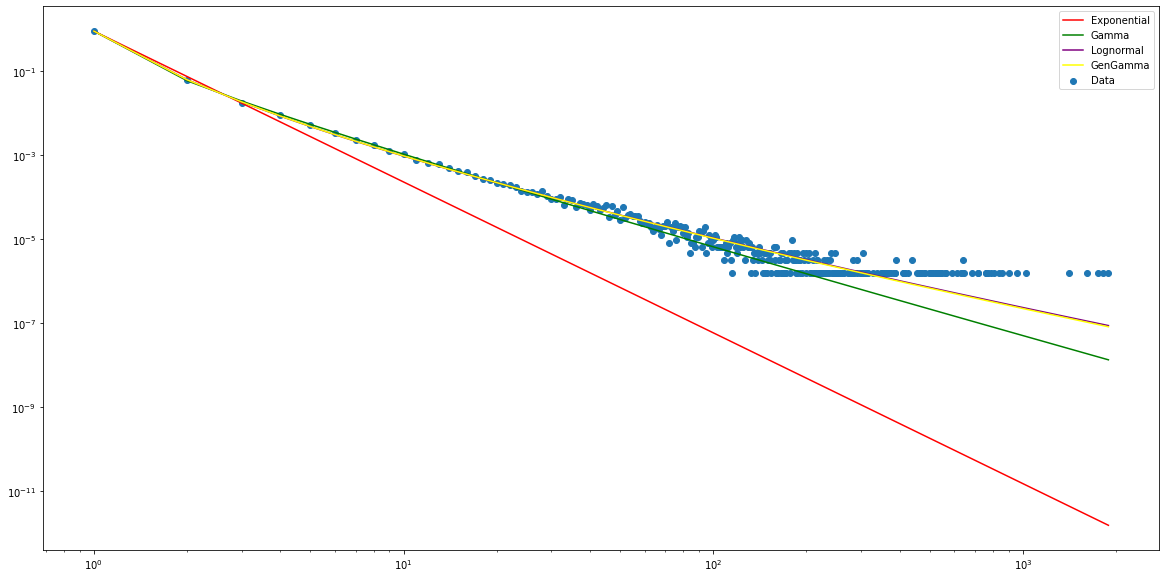

In [203]:
plt.figure(figsize=(20,10))
plt.scatter(x,y, label='Data')
plt.plot(x,exp_sol(x, results_exp.x[0], results_exp.x[1]), c='red', label='Exponential')
plt.plot(x,gamma_sol(x, results_gamma.x[0], results_gamma.x[1], results_gamma.x[2]), c='green', label='Gamma')
plt.plot(x,lognorm_sol(x, results_lognormal.x[0], results_lognormal.x[1], results_lognormal.x[2]), c='purple', label='Lognormal')
plt.plot(x,gengamma_sol(x, results_gg.x[0], results_gg.x[1], results_gg.x[2], results_gg.x[3]), c='yellow', label='GenGamma')
plt.yscale('log')
plt.xscale('log')
#plt.ylim(0.000001,1)
plt.legend()

In [204]:
scores = pd.DataFrame(index = ['Exponential', 'Gamma', 'Lognormal', 'GenGamma'], columns = ['R2', 'LL', 'RMSE'])
scores.loc['Exponential','R2'] = r2_score(y, exp_sol(x, results_exp.x[0], results_exp.x[1]))
scores.loc['Exponential','RMSE'] = np.mean(np.sqrt((y-exp_sol(x, results_exp.x[0], results_exp.x[1]))**2))
yPred =(1/x)*expon.pdf(np.log(x), loc=results_exp.x[0], scale =results_exp.x[1])
scores.loc['Exponential','LL'] =  np.sum( stats.norm.logpdf(yPred, loc=y, scale=np.sqrt(normalizer*y*(1-y))/normalizer ) )


scores.loc['Gamma','R2'] = r2_score(y, gamma_sol(x, results_gamma.x[0], results_gamma.x[1], results_gamma.x[2]))
scores.loc['Gamma','RMSE'] = np.mean(np.sqrt((y-gamma_sol(x, results_gamma.x[0], results_gamma.x[1], results_gamma.x[2]))**2))
yPred =(1/x)*gamma.pdf(np.log(x), a=results_gamma.x[0], loc = results_gamma.x[1], scale = results_gamma.x[2])
scores.loc['Gamma','LL'] = np.sum( stats.norm.logpdf(yPred, loc=y, scale=np.sqrt(normalizer*y*(1-y))/normalizer ) )


scores.loc['GenGamma','R2'] = r2_score(y, gengamma_sol(x, results_gg.x[0], results_gg.x[1], results_gg.x[2], results_gg.x[3]))
scores.loc['GenGamma','RMSE'] = np.mean(np.sqrt((y-gengamma_sol(x, results_gg.x[0], results_gg.x[1], results_gg.x[2], results_gg.x[3]))**2))
yPred =(1/x)*gengamma.pdf(np.log(x), a=results_gg.x[0], c= results_gg.x[1], loc = results_gg.x[2], scale = results_gg.x[3])
scores.loc['GenGamma','LL'] = np.sum( stats.norm.logpdf(yPred, loc=y, scale=np.sqrt(normalizer*y*(1-y))/normalizer ) )


scores.loc['Lognormal','R2'] = r2_score(y, lognorm_sol(x, results_lognormal.x[0], results_lognormal.x[1], results_lognormal.x[2]))
scores.loc['Lognormal','RMSE'] = np.mean(np.sqrt((y-lognorm_sol(x, results_lognormal.x[0], results_lognormal.x[1], results_lognormal.x[2]))**2))
yPred =(1/x)*lognorm.pdf(np.log(x), s=results_lognormal.x[0], loc = results_lognormal.x[1], scale = results_lognormal.x[2])
scores.loc['Lognormal','LL'] = np.sum( stats.norm.logpdf(yPred, loc=y, scale  =np.sqrt(normalizer*y*(1-y))/normalizer ) )

print(scores) 
scores.loc['Gamma','LL']-scores.loc['Lognormal','LL'], scores.loc['Gamma','LL']-scores.loc['GenGamma','LL']

                   R2              LL      RMSE
Exponential  0.999771 -4751594.271410  0.000108
Gamma        0.999987 -2578331.701361  0.000021
Lognormal    0.999998 -4450929.178084  0.000014
GenGamma     0.999998     3417.482578  0.000013


(1872597.4767231606, -2581749.183938638)

In [205]:
scores.loc['Gamma','LL']-scores.loc['Lognormal','LL'], scores.loc['Gamma','LL']-scores.loc['Exponential','LL']

(1872597.4767231606, 2173262.5700489487)

In [206]:
results_gamma.x, results_lognormal.x

(array([0.21512098, 0.15133996, 1.01972824]),
 array([1.03732008, 0.38809207, 0.23935652]))

In [207]:
Data = pd.read_pickle('Filme_meta_it.pkl')
results['Number of Tweets'].loc['Film','Italian'] = len(df)
results['Number of Users'].loc['Film','Italian'] = Data.Screen_Name.nunique()
results['Best Distribution'].loc['Film','Italian'] = 'Lognormal (39)'
results['Gamma Parameters'].loc['Film','Italian'] = [0.21512098, 0.15133996, 1.01972824]
results['LogNormal Parameters'].loc['Film','Italian'] = [1.03732008, 0.38809207, 0.23935652]
results['GenGamma Parameters'].loc['Film','Italian'] = results_gg.x
del Data

In [208]:
df = pd.read_pickle('Film_counts_de.pkl')
n = 0
Nf = df[df.Count>n].Count
x= np.array(df[df.Count>n].groupby('Count')['Count'].count().index)
y = df[df.Count>n].groupby('Count')['Count'].count().values/len(df[df.Count>n].Count)

x_int=x
y_int=list()
for i in range(len(x_int)):
    y_int.append(np.sum(y[:i+1]))
    
normalizer=len(df)
normalizer

297891

In [209]:
len(df), np.sum(df['Count'])

(297891, 444034)

In [210]:
sizes = [len(df.Text.loc[i].split()) for i in df.index]
print(pearsonr(sizes, df['Count'].values))
print(spearmanr(sizes, df['Count'].values))

(0.010799416370826712, 3.760386426068734e-09)
SpearmanrResult(correlation=0.12437474151703155, pvalue=0.0)


In [211]:
pars_exp,cov_exp = curve_fit(xdata=x, ydata=y, f = exp_sol, maxfev = 800000)
pars_gamma,cov_gamma = curve_fit(xdata=x, ydata=y, f = gamma_sol, maxfev = 800000)
pars_lognormal,cov_lognormal = curve_fit(xdata=x, ydata=y, f = lognorm_sol, maxfev = 800000)
pars_pl,cov_pl = curve_fit(xdata=x, ydata=y, f = pl_sol, maxfev = 80000000)
pars_pln,cov_pln = curve_fit(xdata=x, ydata=y, f = powerlognorm_sol, maxfev = 800000)
pars_beta,cov_beta = curve_fit(xdata=x, ydata=y, f = beta_sol, maxfev = 800000)
pars_gg,cov_gg = curve_fit(xdata=x, ydata=y, f = gengamma_sol, maxfev = 800000)

/home/lilia/venv/sample_environment/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [212]:
initParams_g = pars_gamma
initParams_l = pars_lognormal
initParams_e= pars_exp
initParams_p =[1,1]
initParams_b = pars_beta
initParams_gg = pars_gg



results_gamma = minimize(gamma_, initParams_g, method='Nelder-Mead', options={'maxiter': 10000})
print (results_gamma.x)
results_lognormal = minimize(lognorm_, initParams_l, method='Nelder-Mead', options={'maxiter': 10000})
print(results_lognormal.x)
results_exp = minimize(exp_, initParams_e , method='Nelder-Mead', options={'maxiter': 10000})
print(results_exp.x)
results_PL = minimize(PL_, initParams_p, method='Nelder-Mead', options={'maxiter': 10000})
print(results_PL.x)
results_beta = minimize(beta_, initParams_b, method='Nelder-Mead', options={'maxiter': 10000})
print(results_beta.x)
results_gg = minimize(gengamma_, initParams_gg, method='Nelder-Mead', options={'maxiter': 10000})
print(results_gg.x)

[0.22991222 0.15834326 0.91420568]
[0.98151159 0.40385796 0.25151364]
[0.40955904 0.37615623]
[ 0.89488446 -3.65844507]
[9.68482806 3.0937426  0.55608544 0.11899925]
[ 0.31392771  0.89371763 -0.17737341  0.71735736]


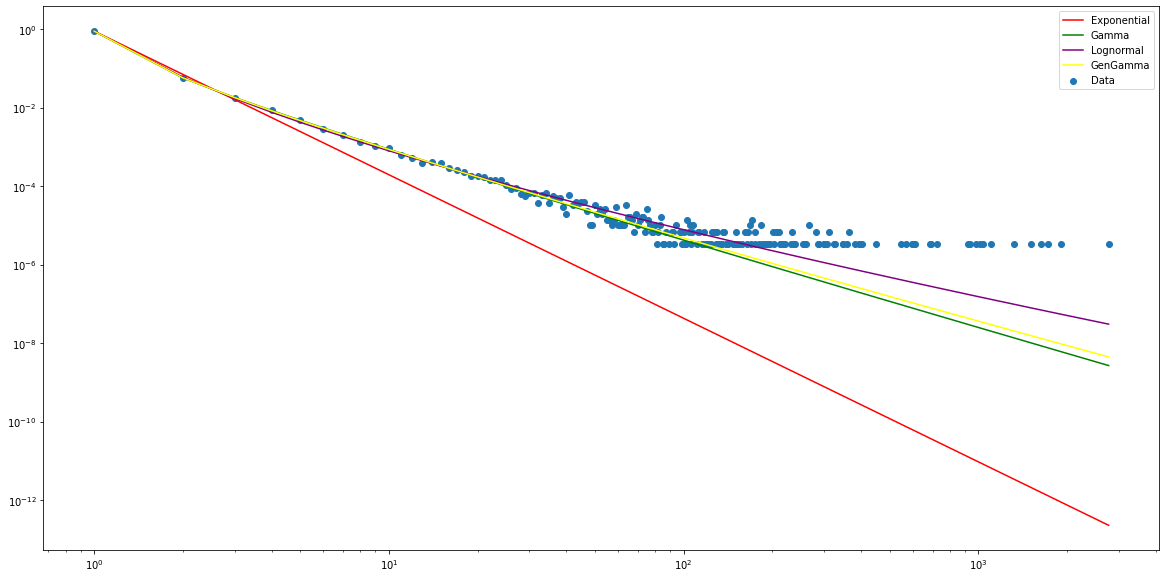

In [213]:
plt.figure(figsize=(20,10))
plt.scatter(x,y, label='Data')
plt.plot(x,exp_sol(x, results_exp.x[0], results_exp.x[1]), c='red', label='Exponential')
plt.plot(x,gamma_sol(x, results_gamma.x[0], results_gamma.x[1], results_gamma.x[2]), c='green', label='Gamma')
plt.plot(x,lognorm_sol(x, results_lognormal.x[0], results_lognormal.x[1], results_lognormal.x[2]), c='purple', label='Lognormal')
plt.plot(x,gengamma_sol(x, results_gg.x[0], results_gg.x[1], results_gg.x[2], results_gg.x[3]), c='yellow', label='GenGamma')
plt.yscale('log')
plt.xscale('log')
#plt.ylim(0.000001,1)
plt.legend()

In [214]:
scores = pd.DataFrame(index = ['Exponential', 'Gamma', 'Lognormal', 'GenGamma'], columns = ['R2', 'LL', 'RMSE'])
scores.loc['Exponential','R2'] = r2_score(y, exp_sol(x, results_exp.x[0], results_exp.x[1]))
scores.loc['Exponential','RMSE'] = np.mean(np.sqrt((y-exp_sol(x, results_exp.x[0], results_exp.x[1]))**2))
yPred =(1/x)*expon.pdf(np.log(x), loc=results_exp.x[0], scale =results_exp.x[1])
scores.loc['Exponential','LL'] =  np.sum( stats.norm.logpdf(yPred, loc=y, scale=np.sqrt(normalizer*y*(1-y))/normalizer ) )


scores.loc['Gamma','R2'] = r2_score(y, gamma_sol(x, results_gamma.x[0], results_gamma.x[1], results_gamma.x[2]))
scores.loc['Gamma','RMSE'] = np.mean(np.sqrt((y-gamma_sol(x, results_gamma.x[0], results_gamma.x[1], results_gamma.x[2]))**2))
yPred =(1/x)*gamma.pdf(np.log(x), a=results_gamma.x[0], loc = results_gamma.x[1], scale = results_gamma.x[2])
scores.loc['Gamma','LL'] = np.sum( stats.norm.logpdf(yPred, loc=y, scale=np.sqrt(normalizer*y*(1-y))/normalizer ) )


scores.loc['GenGamma','R2'] = r2_score(y, gengamma_sol(x, results_gg.x[0], results_gg.x[1], results_gg.x[2], results_gg.x[3]))
scores.loc['GenGamma','RMSE'] = np.mean(np.sqrt((y-gengamma_sol(x, results_gg.x[0], results_gg.x[1], results_gg.x[2], results_gg.x[3]))**2))
yPred =(1/x)*gengamma.pdf(np.log(x), a=results_gg.x[0], c= results_gg.x[1], loc = results_gg.x[2], scale = results_gg.x[3])
scores.loc['GenGamma','LL'] = np.sum( stats.norm.logpdf(yPred, loc=y, scale=np.sqrt(normalizer*y*(1-y))/normalizer ) )


scores.loc['Lognormal','R2'] = r2_score(y, lognorm_sol(x, results_lognormal.x[0], results_lognormal.x[1], results_lognormal.x[2]))
scores.loc['Lognormal','RMSE'] = np.mean(np.sqrt((y-lognorm_sol(x, results_lognormal.x[0], results_lognormal.x[1], results_lognormal.x[2]))**2))
yPred =(1/x)*lognorm.pdf(np.log(x), s=results_lognormal.x[0], loc = results_lognormal.x[1], scale = results_lognormal.x[2])
scores.loc['Lognormal','LL'] = np.sum( stats.norm.logpdf(yPred, loc=y, scale  =np.sqrt(normalizer*y*(1-y))/normalizer ) )

print(scores) 
scores.loc['Gamma','LL']-scores.loc['Lognormal','LL'], scores.loc['Gamma','LL']-scores.loc['GenGamma','LL']

                   R2              LL      RMSE
Exponential  0.999744 -2336238.582974  0.000158
Gamma        1.000000 -1292455.510051  0.000011
Lognormal    0.999989 -2505698.267912  0.000033
GenGamma     1.000000     2217.362062  0.000012


(1213242.7578610834, -1294672.872112463)

In [215]:
scores.loc['Gamma','LL']-scores.loc['Lognormal','LL'], scores.loc['Gamma','LL']-scores.loc['Exponential','LL']

(1213242.7578610834, 1043783.0729235844)

In [216]:
results_gamma.x, results_lognormal.x

(array([0.22991222, 0.15834326, 0.91420568]),
 array([0.98151159, 0.40385796, 0.25151364]))

In [217]:
Data = pd.read_pickle('Film_meta_de.pkl')
results['Number of Tweets'].loc['Film','German'] = len(df)
results['Number of Users'].loc['Film','German'] = Data.Screen_Name.nunique()
results['Best Distribution'].loc['Film','German'] = 'Gamma (69)'
results['Gamma Parameters'].loc['Film','German'] = [0.22991222, 0.15834326, 0.91420568]
results['LogNormal Parameters'].loc['Film','German'] = [0.98151159, 0.40385796, 0.25151364]
results['GenGamma Parameters'].loc['Film','German'] = results_gg.x
del Data

In [218]:
df = pd.read_pickle('Filme_counts_pt.pkl')
n = 0
Nf = df[df.Count>n].Count
x= np.array(df[df.Count>n].groupby('Count')['Count'].count().index)
y = df[df.Count>n].groupby('Count')['Count'].count().values/len(df[df.Count>n].Count)

x_int=x
y_int=list()
for i in range(len(x_int)):
    y_int.append(np.sum(y[:i+1]))
    
normalizer=len(df)
normalizer

7888742

In [219]:
sizes = [len(df.Text.loc[i].split()) for i in df.index]
print(pearsonr(sizes, df['Count'].values))
print(spearmanr(sizes, df['Count'].values))

(0.00557486245917132, 2.9212866637405308e-55)
SpearmanrResult(correlation=0.05291263997172137, pvalue=0.0)


In [220]:
pars_exp,cov_exp = curve_fit(xdata=x, ydata=y, f = exp_sol, maxfev = 800000)
pars_gamma,cov_gamma = curve_fit(xdata=x, ydata=y, f = gamma_sol, maxfev = 800000)
pars_lognormal,cov_lognormal = curve_fit(xdata=x, ydata=y, f = lognorm_sol, maxfev = 800000)
pars_pl,cov_pl = curve_fit(xdata=x, ydata=y, f = pl_sol, maxfev = 80000000)
pars_pln,cov_pln = curve_fit(xdata=x, ydata=y, f = powerlognorm_sol, maxfev = 800000)
pars_beta,cov_beta = curve_fit(xdata=x, ydata=y, f = beta_sol, maxfev = 800000)
pars_gg,cov_gg = curve_fit(xdata=x, ydata=y, f = gengamma_sol, maxfev = 800000)

/home/lilia/venv/sample_environment/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [221]:
initParams_g = pars_gamma
initParams_l = pars_lognormal
initParams_e= pars_exp
initParams_p =[1,1]
initParams_b = pars_beta
initParams_gg = pars_gg



results_gamma = minimize(gamma_, initParams_g, method='Nelder-Mead', options={'maxiter': 10000})
print (results_gamma.x)
results_lognormal = minimize(lognorm_, initParams_l, method='Nelder-Mead', options={'maxiter': 10000})
print(results_lognormal.x)
results_exp = minimize(exp_, initParams_e , method='Nelder-Mead', options={'maxiter': 10000})
print(results_exp.x)
results_PL = minimize(PL_, initParams_p, method='Nelder-Mead', options={'maxiter': 10000})
print(results_PL.x)
results_beta = minimize(beta_, initParams_b, method='Nelder-Mead', options={'maxiter': 10000})
print(results_beta.x)
results_gg = minimize(gengamma_, initParams_gg, method='Nelder-Mead', options={'maxiter': 10000})
print(results_gg.x)

[0.10402399 0.08282785 1.06467406]
[1.24293425 0.26345573 0.10723845]
[0.37751436 0.28965277]
[ 0.93775904 -4.45239281]
[3.88548149e+01 2.37605911e+00 4.07003943e-01 1.27706317e-02]
[ 6.97714132e+01  8.80438196e-02 -2.46436780e-01  1.12201426e-22]


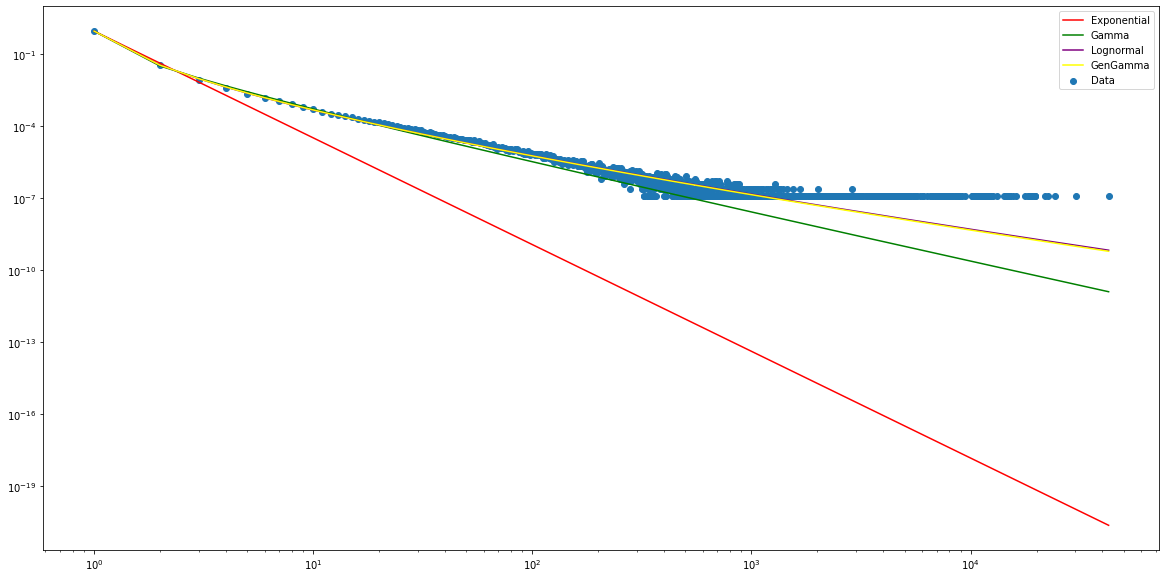

In [222]:
plt.figure(figsize=(20,10))
plt.scatter(x,y, label='Data')
plt.plot(x,exp_sol(x, results_exp.x[0], results_exp.x[1]), c='red', label='Exponential')
plt.plot(x,gamma_sol(x, results_gamma.x[0], results_gamma.x[1], results_gamma.x[2]), c='green', label='Gamma')
plt.plot(x,lognorm_sol(x, results_lognormal.x[0], results_lognormal.x[1], results_lognormal.x[2]), c='purple', label='Lognormal')
plt.plot(x,gengamma_sol(x, results_gg.x[0], results_gg.x[1], results_gg.x[2], results_gg.x[3]), c='yellow', label='GenGamma')
plt.yscale('log')
plt.xscale('log')
#plt.ylim(0.000001,1)
plt.legend()

In [223]:
scores = pd.DataFrame(index = ['Exponential', 'Gamma', 'Lognormal', 'GenGamma'], columns = ['R2', 'LL', 'RMSE'])
scores.loc['Exponential','R2'] = r2_score(y, exp_sol(x, results_exp.x[0], results_exp.x[1]))
scores.loc['Exponential','RMSE'] = np.mean(np.sqrt((y-exp_sol(x, results_exp.x[0], results_exp.x[1]))**2))
yPred =(1/x)*expon.pdf(np.log(x), loc=results_exp.x[0], scale =results_exp.x[1])
scores.loc['Exponential','LL'] =  np.sum( stats.norm.logpdf(yPred, loc=y, scale=np.sqrt(normalizer*y*(1-y))/normalizer ) )


scores.loc['Gamma','R2'] = r2_score(y, gamma_sol(x, results_gamma.x[0], results_gamma.x[1], results_gamma.x[2]))
scores.loc['Gamma','RMSE'] = np.mean(np.sqrt((y-gamma_sol(x, results_gamma.x[0], results_gamma.x[1], results_gamma.x[2]))**2))
yPred =(1/x)*gamma.pdf(np.log(x), a=results_gamma.x[0], loc = results_gamma.x[1], scale = results_gamma.x[2])
scores.loc['Gamma','LL'] = np.sum( stats.norm.logpdf(yPred, loc=y, scale=np.sqrt(normalizer*y*(1-y))/normalizer ) )


scores.loc['GenGamma','R2'] = r2_score(y, gengamma_sol(x, results_gg.x[0], results_gg.x[1], results_gg.x[2], results_gg.x[3]))
scores.loc['GenGamma','RMSE'] = np.mean(np.sqrt((y-gengamma_sol(x, results_gg.x[0], results_gg.x[1], results_gg.x[2], results_gg.x[3]))**2))
yPred =(1/x)*gengamma.pdf(np.log(x), a=results_gg.x[0], c= results_gg.x[1], loc = results_gg.x[2], scale = results_gg.x[3])
scores.loc['GenGamma','LL'] = np.sum( stats.norm.logpdf(yPred, loc=y, scale=np.sqrt(normalizer*y*(1-y))/normalizer ) )


scores.loc['Lognormal','R2'] = r2_score(y, lognorm_sol(x, results_lognormal.x[0], results_lognormal.x[1], results_lognormal.x[2]))
scores.loc['Lognormal','RMSE'] = np.mean(np.sqrt((y-lognorm_sol(x, results_lognormal.x[0], results_lognormal.x[1], results_lognormal.x[2]))**2))
yPred =(1/x)*lognorm.pdf(np.log(x), s=results_lognormal.x[0], loc = results_lognormal.x[1], scale = results_lognormal.x[2])
scores.loc['Lognormal','LL'] = np.sum( stats.norm.logpdf(yPred, loc=y, scale  =np.sqrt(normalizer*y*(1-y))/normalizer ) )

print(scores) 
scores.loc['Gamma','LL']-scores.loc['Lognormal','LL'], scores.loc['Gamma','LL']-scores.loc['GenGamma','LL']

                   R2               LL      RMSE
Exponential  0.999948 -96450204.282509  0.000017
Gamma        0.999975 -59674930.377160  0.000008
Lognormal    0.999996 -62968674.088002  0.000004
GenGamma     0.999995     14443.297560  0.000004


(3293743.7108421624, -59689373.67471979)

In [224]:
scores.loc['Gamma','LL']-scores.loc['Lognormal','LL'], scores.loc['Gamma','LL']-scores.loc['Exponential','LL']

(3293743.7108421624, 36775273.90534909)

In [225]:
results_gamma.x, results_lognormal.x

(array([0.10402399, 0.08282785, 1.06467406]),
 array([1.24293425, 0.26345573, 0.10723845]))

In [226]:
Data = pd.read_pickle('Filme_meta_pt.pkl')
results['Number of Tweets'].loc['Film','Portuguese'] = len(df)
results['Number of Users'].loc['Film','Portuguese'] = Data.Screen_Name.nunique()
results['Best Distribution'].loc['Film','Portuguese'] = 'Lognormal (4901)'
results['Gamma Parameters'].loc['Film','Portuguese'] = [0.10402399, 0.08282785, 1.06467406]
results['LogNormal Parameters'].loc['Film','Portuguese'] = [1.24293425, 0.26345573, 0.10723845]
results['GenGamma Parameters'].loc['Film','Portuguese'] = results_gg.x
del Data

In [227]:
del df

## Summary

In [228]:
results['Number of Tweets']

,Portuguese,German,Italian,Dutch
Covid,20595795,5392367,2719486,3293620
Music,13251392,324803,490764,138851
Film,7888742,297891,638865,115969


In [229]:
results['Number of Users']

,Portuguese,German,Italian,Dutch
Covid,6914262,808096,728279,461353
Music,3905141,154463,248818,69203
Film,2928429,170588,226201,95396


In [230]:
results['Best Distribution']

,Portuguese,German,Italian,Dutch
Covid,Lognormal (9248),Gamma (10181),Gamma (2423),Gamma (1212)
Music,Lognormal (5244),Gamma (100),Lognormal (463),Lognormal (17)
Film,Lognormal (4901),Gamma (69),Lognormal (39),Lognormal (1)


In [231]:
results['Gamma Parameters']

,Portuguese,German,Italian,Dutch
Covid,"[0.22923524, 0.16175473, 1.25827541]","[0.4761285, 0.28463602, 1.07315665]","[0.37597758, 0.23851536, 1.16505069]","[0.42869431, 0.26150682, 1.0231529]"
Music,"[0.10554497, 0.08456082, 1.32430585]","[0.24837645, 0.16721943, 0.84278742]","[0.30513665, 0.20227548, 1.16242819]","[0.34613261, 0.21190135, 0.68151323]"
Film,"[0.10402399, 0.08282785, 1.06467406]","[0.22991222, 0.15834326, 0.91420568]","[0.21512098, 0.15133996, 1.01972824]","[0.22251094, 0.15384843, 0.87614813]"


In [232]:
results['LogNormal Parameters']

,Portuguese,German,Italian,Dutch
Covid,"[1.07329755, 0.40801879, 0.27811408]","[0.81826634, 0.63163395, 0.5893665]","[0.91593551, 0.54040615, 0.46603608]","[0.83784716, 0.58949729, 0.51731733]"
Music,"[1.30371109, 0.26721601, 0.1134458]","[0.92321563, 0.42787877, 0.27400049]","[0.30513665, 0.20227548, 1.16242819]","[0.79746853, 0.50490928, 0.35309344]"
Film,"[1.24293425, 0.26345573, 0.10723845]","[0.98151159, 0.40385796, 0.25151364]","[1.03732008, 0.38809207, 0.23935652]","[0.99044335, 0.39107447, 0.23525351]"


In [233]:
results['GenGamma Parameters']

,Portuguese,German,Italian,Dutch
Covid,"[60.35787792694171, 0.1101127732976187, -0.3789398471342358, 1.7609966077901604e-17]","[0.2628963620057649, 1.276331471318002, -0.22950810441656844, 1.6460467889734967]","[1.0177895623131137, 0.6904902555617067, -0.3190371352362396, 0.3848979928973429]","[65.3774155287216, 0.13562070728056103, -0.5436619499379203, 2.0063156056853197e-14]"
Music,"[68.67651745313904, 0.08493434270564412, -0.2504398750015825, 2.473469949322194e-23]","[0.25062588257089113, 0.99677938173068, -0.16779451682228713, 0.8373029217763974]","[66.50873681767882, 0.1151479134265247, -0.4397678355927668, 5.0946814670686614e-17]","[20.58488198917523, 0.23391353253622083, -0.4374031765218387, 7.429344379802242e-07]"
Film,"[69.77141320512979, 0.08804381958675109, -0.24643677996231844, 1.1220142604002874e-22]","[0.3139277102004762, 0.8937176280434005, -0.17737340532534132, 0.7173573612651032]","[96.89850346045802, 0.0912218125436923, -0.3661494278276699, 3.8012886256919305e-23]","[3.6740035481526414, 0.38244080218852694, -0.29701632189438787, 0.006159101746012651]"


In [234]:
results_d = pd.DataFrame(index = results['GenGamma Parameters'].index, columns = results['GenGamma Parameters'].columns)

In [235]:
for l in ['Covid','Music','Film']:
    for c in ['Portuguese','German','Italian','Dutch']:
        results_d.loc[l,c] = results['GenGamma Parameters'].loc[l,c][0]*results['GenGamma Parameters'].loc[l,c][1]
results_d

,Portuguese,German,Italian,Dutch
Covid,6.646173,0.335543,0.702774,8.866531
Music,5.832995,0.249819,7.658342,4.815082
Film,6.142942,0.280563,8.839257,1.405089


In [236]:
x = np.arange(1,10,0.01)

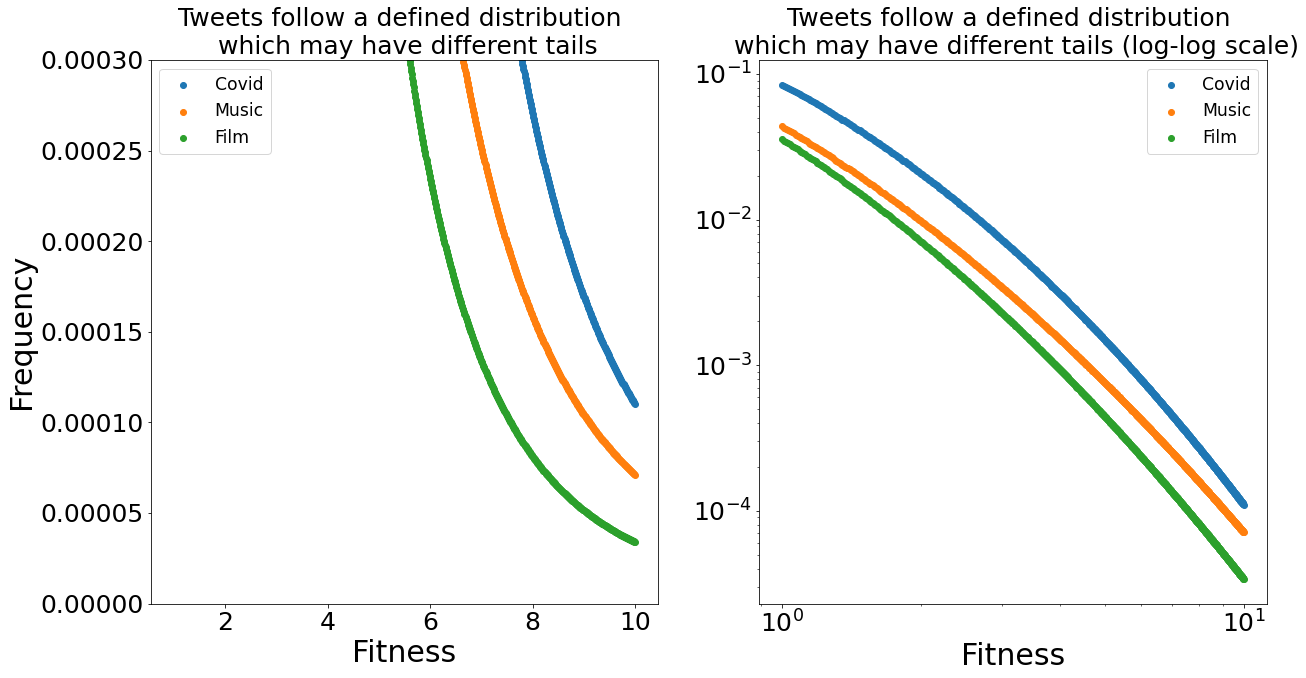

In [237]:
f,ax = plt.subplots(1, 2, figsize=(20,10))



pars = results['GenGamma Parameters'].loc['Covid','Portuguese']
y = gengamma.pdf(x,a=pars[0],c=pars[1], loc=pars[2], scale=pars[3])
ax[0].scatter(x,y, label='Covid')
pars = results['GenGamma Parameters'].loc['Music','Portuguese']
y = gengamma.pdf(x,a=pars[0],c=pars[1], loc=pars[2], scale=pars[3])
ax[0].scatter(x,y, label='Music')
pars = results['GenGamma Parameters'].loc['Film','Portuguese']
y = gengamma.pdf(x,a=pars[0],c=pars[1], loc=pars[2], scale=pars[3])
ax[0].scatter(x,y, label='Film')


ax[0].set_ylim(0,0.0003)


#ax[0].set_xscale('log')
ax[0].legend()

ax[0].legend(fontsize='xx-large')
ax[0].set_title('Tweets follow a defined distribution \n which may have different tails', fontsize=25)

pars = results['GenGamma Parameters'].loc['Covid','Portuguese']
y = gengamma.pdf(x,a=pars[0],c=pars[1], loc=pars[2], scale=pars[3])
ax[1].scatter(x,y, label='Covid')

pars = results['GenGamma Parameters'].loc['Music','Portuguese']
y = gengamma.pdf(x,a=pars[0],c=pars[1], loc=pars[2], scale=pars[3])
ax[1].scatter(x,y, label='Music')

pars = results['GenGamma Parameters'].loc['Film','Portuguese']
y = gengamma.pdf(x,a=pars[0],c=pars[1], loc=pars[2], scale=pars[3])
ax[1].scatter(x,y, label='Film')
ax[1].set_title('Tweets follow a defined distribution \n which may have different tails (log-log scale)', fontsize=25)


ax[1].set_yscale('log')
ax[1].set_xscale('log')
ax[1].legend(fontsize='xx-large')


ax[0].set_ylabel('Frequency', fontsize=30)
ax[0].set_xlabel('Fitness', fontsize=30)
ax[0].tick_params(axis='both', labelsize=25)

#x[1].set_ylabel('Density', fontsize=30)
ax[1].set_xlabel('Fitness', fontsize=30)
ax[1].tick_params(axis='both', labelsize=25)

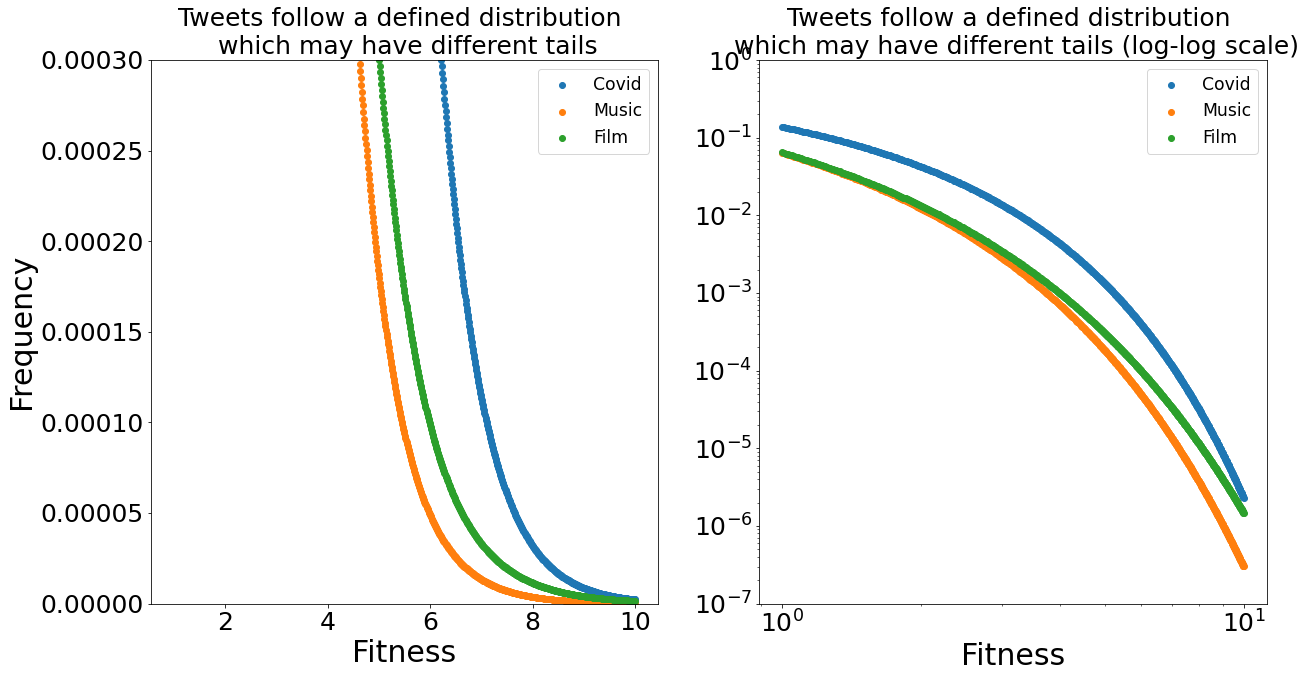

In [238]:
f,ax = plt.subplots(1, 2, figsize=(20,10))



pars = results['GenGamma Parameters'].loc['Covid','German']
y = gengamma.pdf(x,a=pars[0],c=pars[1], loc=pars[2], scale=pars[3])
ax[0].scatter(x,y, label='Covid')
pars = results['GenGamma Parameters'].loc['Music','German']
y = gengamma.pdf(x,a=pars[0],c=pars[1], loc=pars[2], scale=pars[3])
ax[0].scatter(x,y, label='Music')
pars = results['GenGamma Parameters'].loc['Film','German']
y = gengamma.pdf(x,a=pars[0],c=pars[1], loc=pars[2], scale=pars[3])
ax[0].scatter(x,y, label='Film')


ax[0].set_ylim(0,0.0003)


#ax[0].set_xscale('log')
ax[0].legend()

ax[0].legend(fontsize='xx-large')
ax[0].set_title('Tweets follow a defined distribution \n which may have different tails', fontsize=25)

pars = results['GenGamma Parameters'].loc['Covid','German']
y = gengamma.pdf(x,a=pars[0],c=pars[1], loc=pars[2], scale=pars[3])
ax[1].scatter(x,y, label='Covid')

pars = results['GenGamma Parameters'].loc['Music','German']
y = gengamma.pdf(x,a=pars[0],c=pars[1], loc=pars[2], scale=pars[3])
ax[1].scatter(x,y, label='Music')

pars = results['GenGamma Parameters'].loc['Film','German']
y = gengamma.pdf(x,a=pars[0],c=pars[1], loc=pars[2], scale=pars[3])
ax[1].scatter(x,y, label='Film')
ax[1].set_title('Tweets follow a defined distribution \n which may have different tails (log-log scale)', fontsize=25)
ax[1].set_ylim(0.0000001,1)

ax[1].set_yscale('log')
ax[1].set_xscale('log')
ax[1].legend(fontsize='xx-large')


ax[0].set_ylabel('Frequency', fontsize=30)
ax[0].set_xlabel('Fitness', fontsize=30)
ax[0].tick_params(axis='both', labelsize=25)

#x[1].set_ylabel('Density', fontsize=30)
ax[1].set_xlabel('Fitness', fontsize=30)
ax[1].tick_params(axis='both', labelsize=25)

In [239]:
distributions = pd.DataFrame(index = ['Portuguese','German','Dutch','Italian'], columns = ['a','c','scale','Kurtosis','top 20%'])

l='Covid'
for c in ['Portuguese','German','Italian','Dutch']:
    distributions.loc[c,'a'] = results['GenGamma Parameters'].loc[l,c][0]
    distributions.loc[c,'c'] = results['GenGamma Parameters'].loc[l,c][1]
    distributions.loc[c,'scale'] = results['GenGamma Parameters'].loc[l,c][3]

distributions


,a,c,scale,Kurtosis,top 20%
Portuguese,60.357878,0.110113,0.000000,NaN,NaN
German,0.262896,1.276331,1.646047,NaN,NaN
Dutch,65.377416,0.135621,0.000000,NaN,NaN
Italian,1.017790,0.690490,0.384898,NaN,NaN


In [240]:
np.log(3)

1.0986122886681098

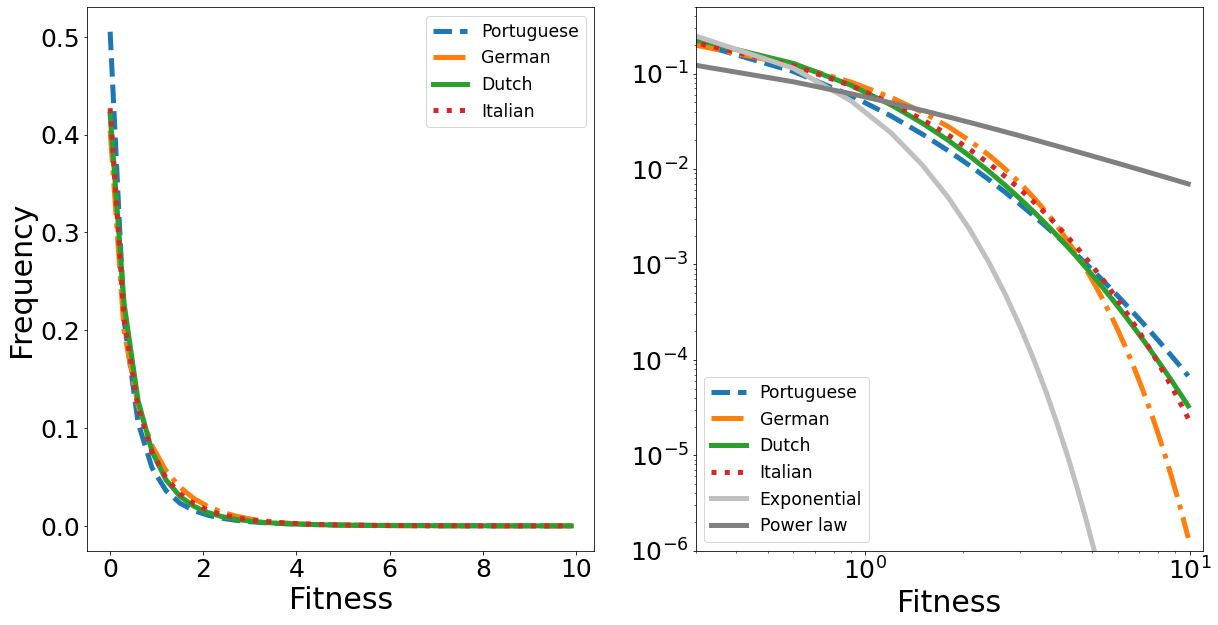

In [241]:
f,ax = plt.subplots(1, 2, figsize=(20,10))

x = np.arange(0,10,0.3)

pars = results['GenGamma Parameters'].loc['Covid','Portuguese']
y = gengamma.pdf(x,a=pars[0],c=pars[1], loc=pars[2], scale=pars[3])
y=y/sum(y)
ax[0].plot(x,y, linewidth = 5, linestyle ="--", label='Portuguese')

pars = results['GenGamma Parameters'].loc['Covid','German']
y = gengamma.pdf(x,a=pars[0],c=pars[1], loc=pars[2], scale=pars[3])
y=y/sum(y)
ax[0].plot(x,y, linestyle ="-.", linewidth = 5, label='German')

pars = results['GenGamma Parameters'].loc['Covid','Dutch']
y = gengamma.pdf(x,a=pars[0],c=pars[1], loc=pars[2], scale=pars[3])
y=y/sum(y)
ax[0].plot(x,y, linewidth = 5, label='Dutch')

pars = results['GenGamma Parameters'].loc['Covid','Italian']
y = gengamma.pdf(x,a=pars[0],c=pars[1], loc=pars[2], scale=pars[3])
y=y/sum(y)
ax[0].plot(x,y, linewidth = 5, linestyle =":", label='Italian')


# pars = results['GenGamma Parameters'].loc['Covid','Italian']
# y = gengamma.pdf(x,a=1,c=1, loc=pars[2], scale=pars[3])
# y=y/sum(y)
# ax[0].plot(x,y, linestyle ="-", linewidth = 5, c='black', label='Exponential')
# #ax[1].set_ylim(0.0001,0.005)


# pars = results['GenGamma Parameters'].loc['Covid','Italian']
# y = gengamma.pdf(x,a=1,c=0.1, loc=pars[2], scale=pars[3])
# y=y/sum(y)
# ax[0].plot(x,y, linestyle ="-", linewidth = 5, c='grey', label='Power law')



#ax[0].set_ylim(0,0.0025)


#ax[0].set_xscale('log')
ax[0].legend()

ax[0].legend(fontsize='xx-large')
#ax[0].set_title('Tweets follow a defined distribution \n which may have different tails', fontsize=25)

pars = results['GenGamma Parameters'].loc['Covid','Portuguese']
y = gengamma.pdf(x,a=pars[0],c=pars[1], loc=pars[2], scale=pars[3])
y=y/sum(y)
ax[1].plot(x,y, linewidth = 5, linestyle ="--", label='Portuguese')

pars = results['GenGamma Parameters'].loc['Covid','German']
y = gengamma.pdf(x,a=pars[0],c=pars[1], loc=pars[2], scale=pars[3])
y=y/sum(y)
ax[1].plot(x,y, linestyle ="-.", linewidth = 5, label='German')

pars = results['GenGamma Parameters'].loc['Covid','Dutch']
y = gengamma.pdf(x,a=pars[0],c=pars[1], loc=pars[2], scale=pars[3])
y=y/sum(y)
ax[1].plot(x,y, linewidth = 5, label='Dutch')

pars = results['GenGamma Parameters'].loc['Covid','Italian']
y = gengamma.pdf(x,a=pars[0],c=pars[1], loc=pars[2], scale=pars[3])
y=y/sum(y)
ax[1].plot(x,y, linestyle =":", linewidth = 5, label='Italian')
#ax[1].set_title('Tweets follow a defined distribution \n which may have different tails (log-log scale)', fontsize=25)


pars = results['GenGamma Parameters'].loc['Covid','Italian']
y = gengamma.pdf(x,a=1,c=1, loc=pars[2], scale=pars[3])
y=y/sum(y)
ax[1].plot(x,y, linestyle ="-", linewidth = 5, c='silver', label='Exponential')
#ax[1].set_ylim(0.0001,0.005)


pars = results['GenGamma Parameters'].loc['Covid','Italian']
y = gengamma.pdf(x,a=1,c=0.1, loc=pars[2], scale=pars[3])
y=y/sum(y)
ax[1].plot(x,y, linestyle ="-", linewidth = 5, c='grey', label='Power law')
ax[1].set_ylim(0.000001,0.5)
ax[1].set_xlim(0.3,11)


ax[1].set_yscale('log')
ax[1].set_xscale('log')
ax[1].legend(fontsize='xx-large')


ax[0].set_ylabel('Frequency', fontsize=30)
ax[0].set_xlabel('Fitness', fontsize=30)
ax[0].tick_params(axis='both', labelsize=25)

#x[1].set_ylabel('Density', fontsize=30)
ax[1].set_xlabel('Fitness', fontsize=30)
ax[1].tick_params(axis='both', labelsize=25)

plt.savefig('Fitness_distributions.pdf')

In [242]:
results['GenGamma Parameters'].loc['Covid','Portuguese']

array([ 6.03578779e+01,  1.10112773e-01, -3.78939847e-01,  1.76099661e-17])

In [243]:
results['GenGamma Parameters'].loc['Covid','German']

array([ 0.26289636,  1.27633147, -0.2295081 ,  1.64604679])

In [259]:
figure.keys()

dict_keys(['Italian', 'Dutch', 'German', 'Portuguese'])

IndexError: index 2 is out of bounds for axis 1 with size 2

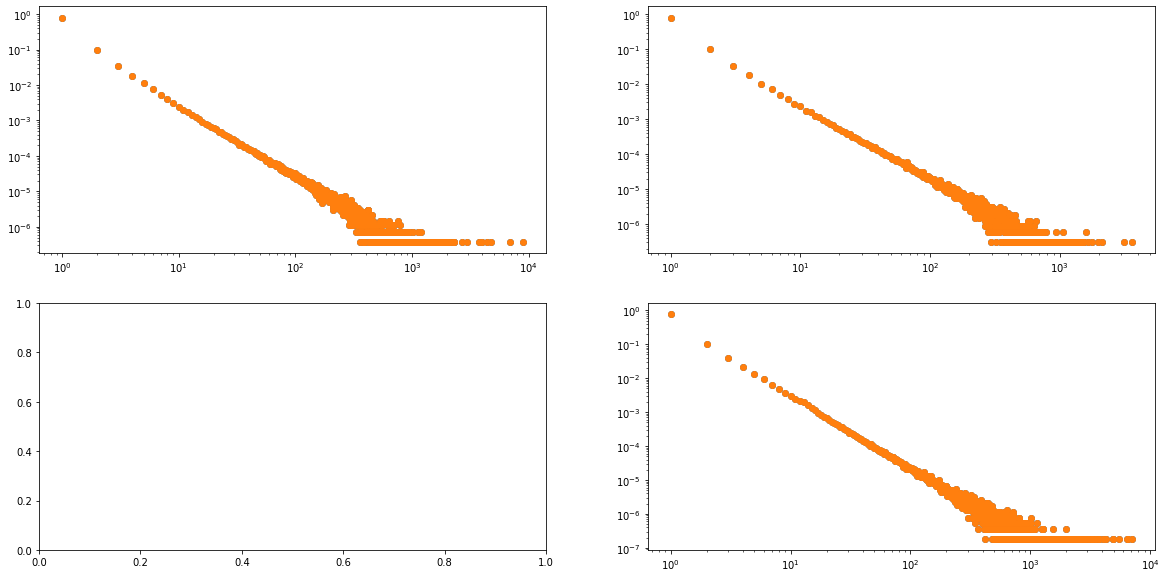

In [305]:
f,ax = plt.subplots(2,2, figsize=(20,10))


ii=0
iii=0
h=0
for i in figure.keys():
    ax[ii,iii].scatter(figure[i].index, figure[i].data, label=i)
    ax[ii,iii].scatter(figure[i].index, figure[i].data, label=i)
    ax[ii,iii].set_yscale('log')
    ax[ii,iii].set_xscale('log')
    h=h+1
    ii=int(h/2)
    iii=h-ii


